<a href="https://colab.research.google.com/github/SciEcon/nns/blob/main/NNS_Agent_Simulations_CFC_St_Moritz_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Set-up

In [362]:
cd /content/drive/MyDrive/NNS

[Errno 2] No such file or directory: '/content/drive/MyDrive/NNS'
/content


In [363]:
pip install seaborn

In [364]:
pip install matplotlib numpy

In [365]:
import pandas as pd
import numpy as np

In [366]:
# @title Environmental parameters
T = 100 # @param {type:"number"} # number of periods, 1 period = 1 month
N = 10000 # @param {type:"number"} # number of agents
#R = 10000 # @param {type:"number"} # fixed amount of reward per period
initial_r = 0.05 # @param {type:"number"} # initial reward ratio
final_i = 0.05 # @param {type:"number"} # final inflation rate
random_seed = 1 # @param {type:"number"} # define the random seed
lower_bound = -0.1 # @param {type:"lower bound of the threshold shock"} # define the lower bound of the staking threshold shock
upper_bound = 0.1 # @param {type:"upper bound of the threshold shock"} # define the upper bound of the staking threshold shock

In [367]:
threshold_shock = np.random.uniform(lower_bound, upper_bound, T)
print(threshold_shock)

[-0.02509198  0.09014286  0.04639879  0.0197317  -0.06879627 -0.0688011
 -0.08838328  0.07323523  0.020223    0.04161452 -0.0958831   0.09398197
  0.06648853 -0.05753218 -0.06363501 -0.0633191  -0.03915155  0.00495129
 -0.013611   -0.04175417  0.02237058 -0.07210123 -0.04157107 -0.02672763
 -0.008786    0.05703519 -0.06006524  0.00284689  0.01848291 -0.09070992
  0.02150897 -0.06589518 -0.08698968  0.08977711  0.09312641  0.06167947
 -0.03907725 -0.08046558  0.03684661 -0.0119695  -0.07559235 -0.00096462
 -0.0931223   0.08186408 -0.048244    0.03250446 -0.03765778  0.0040136
  0.00934206 -0.06302911  0.09391693  0.05502656  0.08789979  0.07896547
  0.01958     0.08437485 -0.0823015  -0.06080343 -0.09095454 -0.03493393
 -0.02226454 -0.04573019  0.0657475  -0.02864933 -0.0438131   0.00853922
 -0.07181516  0.0604394  -0.08508987  0.09737739  0.05444895 -0.06025686
 -0.09889558  0.06309229  0.04137147  0.04580143  0.05425407 -0.08519107
 -0.02830685 -0.07682619  0.07262069  0.02465963 -0.0

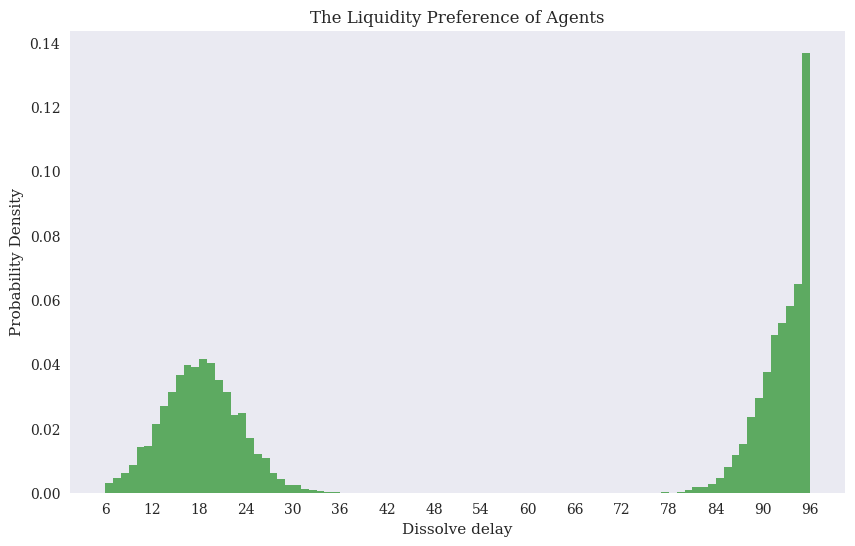

In [368]:
# @title The Liquidity Preference of the Agent: Define the parameters of the distribution with two peaks
mean1 = 18 # @param {type:"number"}
mean2 = 96 # @param {type:"number"}
std_dev = 5 # @param {type:"number"}



import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Import seaborn for KDE plot

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

# Example usage:
generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
random_variables = generator.liquidity_preference(N)  # Generate 10,000 samples


# Create a histogram to visualize the distribution with integer ticks and custom x-labels
plt.figure(figsize=(10, 6))
plt.hist(random_variables, bins=np.arange(6, 97), density=True, alpha=0.6, color='g')
plt.xlabel('Dissolve delay')
plt.ylabel('Probability Density')
plt.title('The Liquidity Preference of Agents')

# Remove background grid lines
plt.grid(False)
# Visualization
# Set ticks at integer values between 6 and 96 and mark multiples of 6 as "0"
ticks = [str(i) if i % 6 == 0 else '' for i in range(6, 97)]
plt.xticks(range(6, 97), ticks)

# Add a fitted line (KDE plot)
#sns.kdeplot(random_variables, color='blue', linewidth=2)

# Export the plot with the fitted line in high resolution
plt.savefig('liquidity_preference_histogram.png', dpi=300)

plt.show()


[45453.26595441 22582.06170746 31035.84594857 ... 33682.85667326
 22373.36261967 69741.46971219]

Mean of Endowments: 46965.9831
Standard Deviation of Endowments: 30495.2022


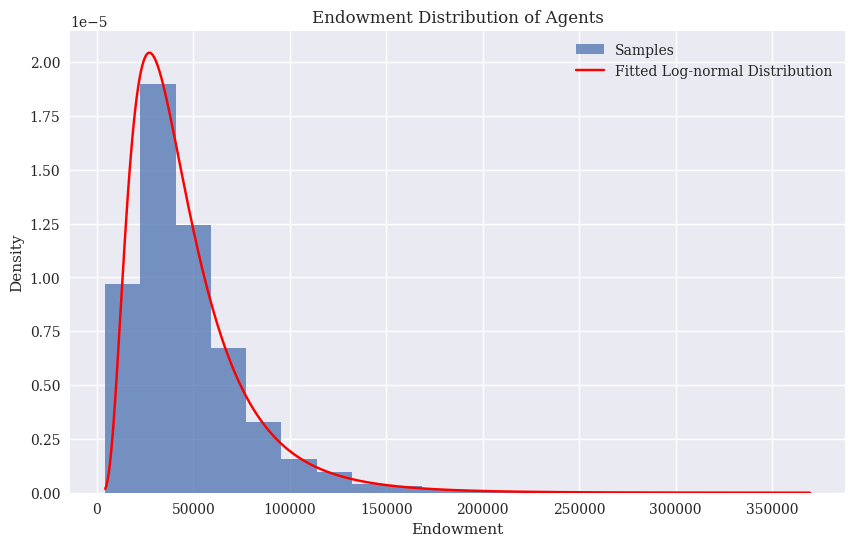

In [369]:
# @title The Endowment of Agents: Define the Parameters of the log-normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

mean_log = 10.57 # @param {type:"number"} # Mean of the logarithm of the distribution
sigma_log = 0.6 # @param {type:"number"} # Standard deviation of the logarithm of the distribution
random_seed = 43 # @param {type:"number"} # define the random seed

# Generate endowments from log-normal distribution
np.random.seed(random_seed)  # Setting a seed for reproducibility
endowments = np.random.lognormal(mean_log, sigma_log, N)

# Display endowments
print(endowments)

# Calculate mean and standard deviation of endowments
mean_endowments = np.mean(endowments)
std_dev_endowments = np.std(endowments)

print(f"\nMean of Endowments: {mean_endowments:.4f}")
print(f"Standard Deviation of Endowments: {std_dev_endowments:.4f}")

# Visualization
plt.figure(figsize=(10, 6))

# Plot histogram of endowments
plt.hist(endowments, bins=20, density=True, alpha=0.75, label="Samples")

# Plot the fitted log-normal distribution
x = np.linspace(min(endowments), max(endowments), N)
pdf = lognorm.pdf(x, sigma_log, scale=np.exp(mean_log))
plt.plot(x, pdf, 'r-', label="Fitted Log-normal Distribution")

plt.xlabel("Endowment")
plt.ylabel("Density")
plt.title("Endowment Distribution of Agents")
plt.legend()
plt.grid(True)


# Export the plot with the fitted line in high resolution
plt.savefig('agent_endowment_histogram.png', dpi=300)
plt.show()

Mean of staking_threshold: 0.0982
Variance of staking_threshold: 0.0054


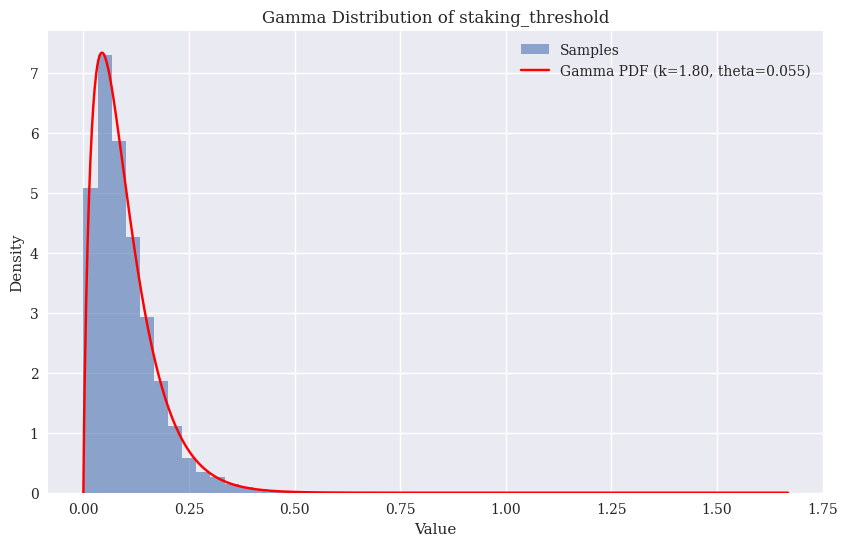

In [370]:
# @title The Staking Threshold of the Agents: Define Gamma Distribution Parameters
k = 1.8 # @param {type:"number"}
theta = 0.055 # @param {type:"number"}
random_seed = 1 # @param {type:"number"} # define the random seed
rng = np.random.default_rng(seed=random_seed)

import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Generate gamma distribution samples for staking_threshold
np.random.seed(random_seed)  # Setting a seed for reproducibility
staking_threshold = gamma.rvs(k, scale=theta, size=N,random_state=rng)

# Compute mean and variance
mean = np.mean(staking_threshold)
variance = np.var(staking_threshold)

print(f"Mean of staking_threshold: {mean:.4f}")
print(f"Variance of staking_threshold: {variance:.4f}")

# Visualization
plt.figure(figsize=(10, 6))

# Plot histogram of samples
plt.hist(staking_threshold, bins=20, density=True, alpha=0.6, label="Samples")

# Plot PDF of the Gamma distribution
x = np.linspace(0, max(staking_threshold)+1, 1000)
y = gamma.pdf(x, k, scale=theta)
plt.plot(x, y, 'r-', label=f"Gamma PDF (k={k:.2f}, theta={theta})")

plt.title("Gamma Distribution of staking_threshold")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Export the plot with the fitted line in high resolution
plt.savefig('staking_threshold.png', dpi=300)
plt.show()


In [371]:
# Define a threshold value
threshold_value = 0.10

# Calculate the number of agents with staking threshold smaller than the threshold value
num_agents_above_threshold = np.sum(staking_threshold <= threshold_value)

print(f"Number of agents with staking threshold <= {threshold_value}: {num_agents_above_threshold}")


Number of agents with staking threshold <= 0.1: 6072


In [372]:
# Define a threshold value
threshold_value = 0.1

# Calculate the number of agents with staking threshold larger than the threshold value
num_agents_above_threshold = np.sum(staking_threshold > threshold_value)

print(f"Number of agents with staking threshold >= {threshold_value}: {num_agents_above_threshold}")

Number of agents with staking threshold >= 0.1: 3928


In [373]:
import ipywidgets as widgets
from IPython.display import display, HTML

# Define form fields with full variable names
random_seed_field = widgets.IntText(value=random_seed)
mean_log_field = widgets.FloatText(value=mean_log)
sigma_log_field = widgets.FloatText(value=sigma_log)
k_field = widgets.FloatText(value=k)
theta_field = widgets.FloatText(value=theta)
mean1_field = widgets.IntText(value=mean1)
mean2_field = widgets.IntText(value=mean2)
std_dev_field = widgets.IntText(value=std_dev)
N_field = widgets.IntText(value=N)
T_field = widgets.IntText(value=T)

# Create a form using VBox with HTML descriptions
form = widgets.VBox([
    widgets.HTML('<b>Random Seed:</b> See random seed value'),
    random_seed_field,
    widgets.HTML('<b>Mean Logarithm of Endowments:</b> See mean log value'),
    mean_log_field,
    widgets.HTML('<b>Standard Deviation of Logarithm of Endowments:</b> See sigma log value'),
    sigma_log_field,
    widgets.HTML('<b>Shape Parameter (k):</b> See k value'),
    k_field,
    widgets.HTML('<b>Scale Parameter (theta):</b> See theta value'),
    theta_field,
    widgets.HTML('<b>Mean1:</b> See mean1 value'),
    mean1_field,
    widgets.HTML('<b>Mean2:</b> See mean2 value'),
    mean2_field,
    widgets.HTML('<b>Standard Deviation:</b> See standard deviation value'),
    std_dev_field,
    widgets.HTML('<b>Number of Agents:</b> See number of agents value'),
    N_field,
    widgets.HTML('<b>Number of Periods:</b> See number of periods value'),
    T_field,
])

# Display the form
display(form)


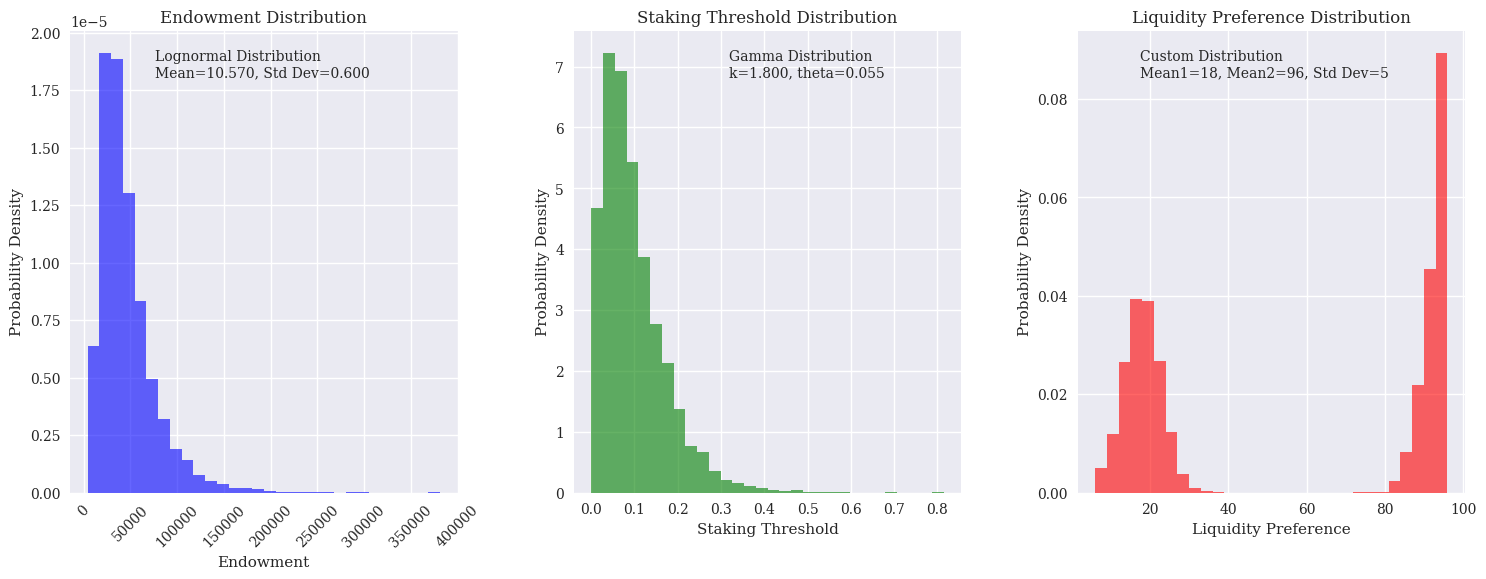

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gamma

class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator):
    np.random.seed(0)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=0)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity) for endowment, staking_threshold, liquidity in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents


# Create a CustomRandomVariableGenerator instance for liquidity preference
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator)

# Extract endowments, staking_thresholds, and liquidity_preferences
endowments = [agent.endowment for agent in agents]
staking_thresholds = [agent.staking_threshold for agent in agents]
liquidity_preferences = [agent.liquidity_preference for agent in agents]

# Reusing the previous code with a modification to rotate the x-ticks labels in the first subfigure
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(endowments, bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('Endowment')
plt.ylabel('Probability Density')
plt.title('Endowment Distribution')
plt.text(0.22, 0.9, f'Lognormal Distribution\nMean={mean_log:.3f}, Std Dev={sigma_log:.3f}', transform=plt.gca().transAxes, fontsize=10)
plt.xticks(rotation=45)  # Rotate the x-ticks labels

plt.subplot(1, 3, 2)
plt.hist(staking_thresholds, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Staking Threshold')
plt.ylabel('Probability Density')
plt.title('Staking Threshold Distribution')
plt.text(0.4, 0.9, f'Gamma Distribution\nk={k:.3f}, theta={theta:.3f}', transform=plt.gca().transAxes, fontsize=10)

plt.subplot(1, 3, 3)
plt.hist(liquidity_preferences, bins=30, density=True, alpha=0.6, color='r')
plt.xlabel('Liquidity Preference')
plt.ylabel('Probability Density')
plt.title('Liquidity Preference Distribution')
plt.text(0.16, 0.9, f'Custom Distribution\nMean1={mean1}, Mean2={mean2}, Std Dev={std_dev}', transform=plt.gca().transAxes, fontsize=10)

# Adjusting space between the subplots
plt.subplots_adjust(wspace=0.3)

# Save the figure


plt.savefig('agent_initialize.png')

plt.show()


In [375]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Endowment Distribution', 'Staking Threshold Distribution', 'Liquidity Preference Distribution'))

# Endowment Distribution
fig.add_trace(go.Histogram(x=endowments, nbinsx=30, opacity=0.6, marker_color='blue'), row=1, col=1)
fig.update_xaxes(title_text='Endowment', row=1, col=1)
fig.update_yaxes(title_text='Probability Density', row=1, col=1)

# Staking Threshold Distribution
fig.add_trace(go.Histogram(x=staking_thresholds, nbinsx=30, opacity=0.6, marker_color='green'), row=1, col=2)
fig.update_xaxes(title_text='Staking Threshold', row=1, col=2)
fig.update_yaxes(title_text='Probability Density', row=1, col=2)

# Liquidity Preference Distribution
fig.add_trace(go.Histogram(x=liquidity_preferences, nbinsx=30, opacity=0.6, marker_color='red'), row=1, col=3)
fig.update_xaxes(title_text='Liquidity Preference', row=1, col=3)
fig.update_yaxes(title_text='Probability Density', row=1, col=3)

fig.update_layout(height=400, width=1200, showlegend=False)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)

fig.show()


# Part I: The Benchmark

## The constant yearly inflation rate

In [376]:
import numpy as np
import matplotlib.ticker as mticker

class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        if t // 12 <= 8:
            yearly_inflation_rate = self.final_i + 0*self.final_i * ((8 - (t // 12)) / 8) ** 2
        else:
            yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
reward_calculator = RewardRateCalculator(final_i, initial_supply=469000000)

In [377]:
def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.00, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+1):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)

        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)

# Display the first few monthly rewards, yearly rewards, and current supplies for verification
monthly_rewards[:15], yearly_rewards[:15], yearly_inflation_rates[:15], current_supplies[:15]


([nan,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  1954166.6666666667,
  2051875.0000000012,
  2051875.0000000012],
 [nan,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  23450000.0,
  24622500.000000015,
  24622500.000000015],
 [nan,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05],
 [469000000,
  470954166.6666667,
  472908333.3333334,
  474862500.00000006,
  476816666.66666675,
  478770833.33333343,
  480725000.0000001,
  482679166.6666668,
  484633333.3333335,
  486587500.0000002,
  488541666.66666687,
  490495833.33333355,
  492450000.00000024,
  494501875.00000024,
  496553750.00000024])

In [378]:
!pip install plotly

In [379]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np  # Assuming you have imported numpy


# Adjusting the rewards for plot display in millions (M)
monthly_rewards_million = np.array(monthly_rewards) / 1e6
yearly_rewards_million = np.array(yearly_rewards) / 1e6

# Generate the figure with two subplots
fig = make_subplots(rows=2, cols=1)

# Add monthly rewards to the first subplot
fig.add_trace(
    go.Scatter(x=list(range(1, 101)), y=monthly_rewards_million, name="Monthly Rewards", marker_color='red'),
    row=1, col=1
)

# Add yearly rewards to the second subplot
fig.add_trace(
    go.Scatter(x=list(range(1, 101)), y=yearly_rewards_million, name="Yearly Rewards", marker_color='blue'),
    row=2, col=1
)

# Set x-axis title for both subplots
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)

# Set y-axes titles for both subplots
fig.update_yaxes(title_text="Monthly Reward (M)", row=1, col=1, tickformat=".3f")
fig.update_yaxes(title_text="Yearly Reward (M)", row=2, col=1, tickformat=".3f")

# Update layout and titles
fig.update_layout(
    title_text="Monthly and Yearly Reward Distribution Over 8+ Years Given an Initial Supply of 469M",
    height=600,  # Adjust the height to ensure both subplots are visible
    legend=dict(yanchor="top", y=1.2, xanchor="right", x=0.92)
)

# Show the plot
fig.show()


In [380]:
# Additional code to visualize the yearly_inflation_rate and the current_supply over time

# Variables for storing yearly inflation rates and current supply values over time
# Adjusting the rewards for plot display in millions (M)
current_supplies = np.array(current_supplies) / 1e6

# Create a Plotly figure
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add yearly inflation rate to the primary y-axis
fig2.add_trace(
    go.Scatter(x=list(range(1, 101)), y=yearly_inflation_rates, name="Yearly Inflation Rate", marker_color='red'),
    secondary_y=False,
)

# Add current supply values to the secondary y-axis
fig2.add_trace(
    go.Scatter(x=list(range(1, 101)), y=current_supplies, name="Current Supply (M)", marker_color='blue'),
    secondary_y=True,
)

# Set x-axis title
fig2.update_xaxes(title_text="Month")

# Set y-axes titles
fig2.update_yaxes(title_text="Yearly Inflation Rate", secondary_y=False)
fig2.update_yaxes(title_text="Current Supply (M)", secondary_y=True, tickformat=".3f")

# Update layout and titles
fig2.update_layout(
    title_text="Yearly Inflation Rate and Current Supply Over Time with the Initial Supply of 469M",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.5)
)

# Show the plot
fig2.show()



In [381]:
class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.wealth = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference
        self.reward = 0
        self.cum_reward = 0
        self.token_stake = 0
        self.action = None
        self.dissolve_delay= None
        self.age = None
        self.governor = 0
        self.age_multiplier = 0
        self.dissolve_delay_multiplier = 0
        self.multiplied_gov_stake = 0
        self.estimated_reward_ratio = 0
        self.reward_ratio = 0

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed):
    np.random.seed(random_seed)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=random_seed)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity_preference) for endowment, staking_threshold, liquidity_preference in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents

# Create an instance of CustomRandomVariableGenerator with desired parameters
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
# Initialize agents using the initialize_agents function
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed)


class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
initial_supply = sum(agent.endowment for agent in agents) ### the initial supply is the sum of all agent endowments
reward_calculator = RewardRateCalculator(final_i, initial_supply=initial_supply)

def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.05, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+2):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)

        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)
# Display the first few monthly rewards, yearly rewards, and current supplies for verification
monthly_rewards[:15], yearly_rewards[:15], yearly_inflation_rates[:15], current_supplies[:15]


([nan,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  2053480.3193497797,
  2053480.3193497797],
 [nan,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  24641763.832197357,
  24641763.832197357],
 [nan,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05],
 [469366930.1370926,
  471322625.67933047,
  473278321.22156835,
  475234016.7638062,
  477189712.3060441,
  479145407.848282,
  481101103.39051986,
  483056798.93275774,
  485012494.4749956,
  486968190.0172335,
  488923885.55947137,
  490879581.10170925,
  492835276.643

In [382]:
class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.wealth = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference
        self.reward = 0
        self.cum_reward = 0
        self.token_stake = 0
        self.action = None
        self.dissolve_delay= None
        self.age = None
        self.governor = 0
        self.age_multiplier = 0
        self.dissolve_delay_multiplier = 0
        self.multiplied_gov_stake = 0
        self.estimated_reward_ratio = 0
        self.reward_ratio = 0

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed):
    np.random.seed(random_seed)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=random_seed)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity_preference) for endowment, staking_threshold, liquidity_preference in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents

# Create an instance of CustomRandomVariableGenerator with desired parameters
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
# Initialize agents using the initialize_agents function
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed)



class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        if t // 12 <= 8:
            yearly_inflation_rate = self.final_i + 0*self.final_i * ((8 - (t // 12)) / 8) ** 2
        else:
            yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
initial_supply = sum(agent.endowment for agent in agents) ### the initial supply is the sum of all agent endowments
reward_calculator = RewardRateCalculator(final_i, initial_supply=initial_supply)

def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.05, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+2):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)

        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)
def simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies):
    current_supplies = current_supplies ### This is the array for the current supplies
    monthly_rewards = monthly_rewards ### This is the array for the monthly rewards
    liquid_counts = []
    stake_counts = []
    dissolve_counts = []
    governor_counts = []
    liquid_tokens_list = []
    stake_tokens_list = []
    dissolve_tokens_list = []
    governor_tokens_list =[]
    multiplied_gov_stakes_list =[]

    for t in range(0,T+1):
        # Update counts
        monthly_reward = monthly_rewards[t]
        liquid_counts.append(sum(1 for agent in agents if agent.token_stake == 0))
        stake_counts.append(sum(1 for agent in agents if agent.token_stake == 1))
        dissolve_counts.append(sum(1 for agent in agents if agent.token_stake == 2))
        governor_counts.append(sum(1 for agent in agents if agent.governor==1))

        # Update counts
        liquid_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 0)
        stake_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 1)
        dissolve_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 2)
        governor_tokens =sum(agent.wealth for agent in agents if agent.governor==1)


        # Storing token values
        liquid_tokens_list.append(liquid_tokens)
        stake_tokens_list.append(stake_tokens)
        dissolve_tokens_list.append(dissolve_tokens)
        governor_tokens_list.append(governor_tokens)

        # Dynamics
        for agent in agents:
            if agent.governor == 1:
                agent.multiplied_gov_stake = agent.wealth*agent.age_multiplier*agent.dissolve_delay_multiplier
            else:
                agent.multiplied_gov_stake=0
        multiplied_gov_stakes =sum(agent.multiplied_gov_stake for agent in agents if agent.governor==1)
        multiplied_gov_stakes_list.append(multiplied_gov_stakes)

        for agent in agents:
            if multiplied_gov_stakes == 0:
                agent.estimated_reward_ratio = initial_r ### period 0
            else:
               agent.estimated_reward_ratio = 12*monthly_reward*agent.dissolve_delay_multiplier/multiplied_gov_stakes
               ##assume neuron age multiplier =1, assume the agent locked in the previous period for his own dissolve delay

            agent.reward_share = agent.multiplied_gov_stake/multiplied_gov_stakes if agent.governor ==1 else 0
            if t == 0:
              agent.reward = 0
              agent.reward_ratio=0
            else:
              agent.reward = agent.reward_share * monthly_reward
              agent.reward_ratio = 12* agent.reward/agent.wealth

            agent.cum_reward += agent.reward
            agent.wealth += agent.reward

            if agent.token_stake == 0:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    agent.token_stake = 1 if agent.action == 1 else 0
                    agent.dissolve_delay = 6 if agent.governor == 1 else 0
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor == 1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor == 1 else 0

            elif agent.token_stake == 1:
                    agent.action = 0 if agent.reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 1
                    agent.governor = 1 if agent.action ==0 else 0
                    agent.token_stake = 2 if agent.action == 1 else 1
                    agent.dissolve_delay = 6 if agent.governor==1 else 5
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor==1 else 0

                    agent.age = agent.age+1 if agent.governor==1 else 0
                    agent.age_multiplier = 1 if agent.governor==1 else 0

            else:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    if agent.governor==1:
                      agent.dissolve_delay = 6
                      agent.token_stake = 1
                    elif agent.dissolve_delay>0:
                      agent.dissolve_delay-=1
                      agent.token_stake=2
                    else:
                      agent.dissolve_delay=0
                      agent.token_stake=0
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor==1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor==1 else 0


        # Update the lists

    return liquid_counts, stake_counts, dissolve_counts, governor_counts, liquid_tokens_list, stake_tokens_list, dissolve_tokens_list, governor_tokens_list, multiplied_gov_stakes_list

In [383]:
# Define the threshold value
threshold_value = 0.1

# Calculate the number of agents with staking_threshold <= threshold_value
num_agents_below_threshold = sum(1 for agent in agents if agent.staking_threshold <= threshold_value)

print(f"Number of agents with staking threshold <= {threshold_value}: {num_agents_below_threshold}")


Number of agents with staking threshold <= 0.1: 6009


In [384]:
# Define the threshold value
threshold_value = 0.05

# Calculate the number of agents with staking_threshold <= threshold_value
num_agents_below_threshold = sum(1 for agent in agents if agent.staking_threshold <= threshold_value)

print(f"Number of agents with staking threshold <= {threshold_value}: {num_agents_below_threshold}")

Number of agents with staking threshold <= 0.05: 2888


In [385]:
results = simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies)

In [386]:
liquid_counts =results[0]
stake_counts =results[1]
dissolve_counts=results[2]
governor_counts=results[3]
liquid_tokens_list=results[4]
stake_tokens_list =results[5]
dissolve_tokens_list=results[6]
governor_tokens_list=results[7]
multiplied_gov_stakes_list=results[8]

In [387]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(governor_counts)))

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces to the subplots
fig.add_trace(go.Scatter(x=x_values, y=governor_counts, fill='tozeroy', mode='none', line=dict(color='blue'), name='Governor Counts'))
fig.add_trace(go.Scatter(x=x_values, y=governor_tokens_list, fill='tonexty', mode='none', line=dict(color='green'), name='Governor Tokens'), secondary_y=True)

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    legend=dict(x=0.6, y=1.3),
    title="Distribution of Governor Counts and Governor Tokens Over Time: The Benchmark",
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True,
)

# Update secondary y-axis label
fig.update_yaxes(title_text="Tokens", secondary_y=True)

# Show the plot
fig.show()


In [388]:
import plotly.graph_objects as go

# Convert range to list
x_values = list(range(len(liquid_counts)))

# Create a stacked area plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=liquid_counts, fill='tozeroy', mode='none', stackgroup='agents', line=dict(color='blue'), name='Liquid'))
fig.add_trace(go.Scatter(x=x_values, y=stake_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='green'), name='Stake'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='red'), name='Dissolve'))

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Agent's States Over Time: The Benchmark",
    legend=dict(x=0.6, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [389]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot
fig.add_trace(go.Scatter(x=x_values, y=liquid_tokens_list, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Tokens",
    title="Token Dynamics Over Time: The Benchmark",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [390]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Calculate the total at each time step for normalization
totals = np.array(liquid_tokens_list) + np.array(stake_tokens_list) + np.array(dissolve_tokens_list)

# Normalize the data
liquid_percent = np.array(liquid_tokens_list) / totals*100
stake_percent = np.array(stake_tokens_list) / totals*100
dissolve_percent = np.array(dissolve_tokens_list) / totals*100

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot with normalized data
fig.add_trace(go.Scatter(x=x_values, y=liquid_percent, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Percentage",
    title="Token Dynamics Over Time (Percentage): The Benchmark",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=12)),
    yaxis=dict(title_font=dict(size=12)),  # Set the y-axis range to 0-100%
    title_font=dict(size=16),
    showlegend=True,
)

# Show the plot
fig.show()


In [391]:
mean_value_B_liquid = np.mean(liquid_percent)
std_deviation_B_liquid = np.std(liquid_percent)
mean_value_B_stake = np.mean(stake_percent)
std_deviation_B_stake = np.std(stake_percent)
mean_value_B_dissolve = np.mean(dissolve_percent)
std_deviation_B_dissolve = np.std(dissolve_percent)

print("Mean Value of liquid token percentage:", mean_value_B_liquid)
print("Standard Deviation of liquid token percentage:", std_deviation_B_liquid)
print("Mean Value of stake token percentage:", mean_value_B_stake)
print("Standard Deviation of stake token percentage:", std_deviation_B_stake)
print("Mean Value of dissolve token percentage:", mean_value_B_dissolve)
print("Standard Deviation of dissolve token percentage:", std_deviation_B_dissolve)

Mean Value of liquid token percentage: 38.25162462324937
Standard Deviation of liquid token percentage: 9.752766093846628
Mean Value of stake token percentage: 36.51672874628305
Standard Deviation of stake token percentage: 23.253481202029683
Mean Value of dissolve token percentage: 25.23164663046758
Standard Deviation of dissolve token percentage: 23.235435747226166


# Part II: Inflation Rate

In [392]:
class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.wealth = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference
        self.reward = 0
        self.cum_reward = 0
        self.token_stake = 0
        self.action = None
        self.dissolve_delay= None
        self.age = None
        self.governor = 0
        self.age_multiplier = 0
        self.dissolve_delay_multiplier = 0
        self.multiplied_gov_stake = 0
        self.estimated_reward_ratio = 0
        self.reward_ratio = 0

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed):
    np.random.seed(random_seed)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=random_seed)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity_preference) for endowment, staking_threshold, liquidity_preference in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents

# Create an instance of CustomRandomVariableGenerator with desired parameters
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
# Initialize agents using the initialize_agents function
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed)


class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        if t // 12 <= 8:
            yearly_inflation_rate = self.final_i + self.final_i * ((8 - (t // 12)) / 8) ** 2
        else:
            yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
initial_supply = sum(agent.endowment for agent in agents) ### the initial supply is the sum of all agent endowments
reward_calculator = RewardRateCalculator(final_i, initial_supply=initial_supply)

def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.00, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+2):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)


        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)
monthly_rewards[:15], yearly_rewards[:15], yearly_inflation_rates[:15], current_supplies[:15]


([nan,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3911391.084475772,
  3798327.4359401427,
  3798327.4359401427],
 [nan,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  46936693.01370926,
  45579929.23128171,
  45579929.23128171],
 [nan,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.08828125,
  0.08828125],
 [469366930.1370926,
  473278321.22156835,
  477189712.3060441,
  481101103.39051986,
  485012494.4749956,
  488923885.55947137,
  492835276.6439471,
  496746667.7284229,
  500658058.81289864,
  504569449.8973744,
  508480840.98185015,
  512392232.0663259,
  516303623.15080

In [393]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np  # Assuming you have imported numpy


# Adjusting the rewards for plot display in millions (M)
monthly_rewards_million = np.array(monthly_rewards) / 1e6
yearly_rewards_million = np.array(yearly_rewards) / 1e6

# Generate the figure with two subplots
fig = make_subplots(rows=2, cols=1)

# Add monthly rewards to the first subplot
fig.add_trace(
    go.Scatter(x=list(range(1, 101)), y=monthly_rewards_million, name="Monthly Rewards", marker_color='red'),
    row=1, col=1
)

# Add yearly rewards to the second subplot
fig.add_trace(
    go.Scatter(x=list(range(1, 101)), y=yearly_rewards_million, name="Yearly Rewards", marker_color='blue'),
    row=2, col=1
)

# Set x-axis title for both subplots
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)

# Set y-axes titles for both subplots
fig.update_yaxes(title_text="Monthly Reward (M)", row=1, col=1, tickformat=".3f")
fig.update_yaxes(title_text="Yearly Reward (M)", row=2, col=1, tickformat=".3f")

# Update layout and titles
fig.update_layout(
    title_text="Monthly and Yearly Reward Distribution Over 8+ Years Given an Initial Supply of 469M",
    height=600,  # Adjust the height to ensure both subplots are visible
    legend=dict(yanchor="top", y=1.2, xanchor="right", x=0.92)
)

# Show the plot
fig.show()


In [394]:
# Additional code to visualize the yearly_inflation_rate and the current_supply over time

# Variables for storing yearly inflation rates and current supply values over time
# Adjusting the rewards for plot display in millions (M)
current_supply_values = np.array(current_supplies) / 1e6

# Create a Plotly figure
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add yearly inflation rate to the primary y-axis
fig2.add_trace(
    go.Scatter(x=list(range(1, 101)), y=yearly_inflation_rates, name="Yearly Inflation Rate", marker_color='red'),
    secondary_y=False,
)

# Add current supply values to the secondary y-axis
fig2.add_trace(
    go.Scatter(x=list(range(1, 101)), y=current_supplies, name="Current Supply (M)", marker_color='blue'),
    secondary_y=True,
)

# Set x-axis title
fig2.update_xaxes(title_text="Month")

# Set y-axes titles
fig2.update_yaxes(title_text="Yearly Inflation Rate", secondary_y=False)
fig2.update_yaxes(title_text="Current Supply (M)", secondary_y=True, tickformat=".2f")

# Update layout and titles
fig2.update_layout(
    title_text="Yearly Inflation Rate and Current Supply Over Time with the Initial Supply of 469M",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.5)
)

# Show the plot
fig2.show()



In [395]:
def simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies, yearly_inflation_rates=yearly_inflation_rates):
    current_supplies = current_supplies ### This is the array for the current supplies
    monthly_rewards = monthly_rewards ### This is the array for the monthly rewards
    yearly_inflation_rates = yearly_inflation_rates
    liquid_counts = []
    stake_counts = []
    dissolve_counts = []
    governor_counts = []
    liquid_tokens_list = []
    stake_tokens_list = []
    dissolve_tokens_list = []
    governor_tokens_list =[]
    multiplied_gov_stakes_list =[]

    for t in range(0,T+1):
        yearly_inflation_rate = yearly_inflation_rates[t]
        # Update counts
        monthly_reward = monthly_rewards[t]
        liquid_counts.append(sum(1 for agent in agents if agent.token_stake == 0))
        stake_counts.append(sum(1 for agent in agents if agent.token_stake == 1))
        dissolve_counts.append(sum(1 for agent in agents if agent.token_stake == 2))
        governor_counts.append(sum(1 for agent in agents if agent.governor==1))

        # Update counts
        liquid_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 0)
        stake_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 1)
        dissolve_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 2)
        governor_tokens =sum(agent.wealth for agent in agents if agent.governor==1)


        # Storing token values
        liquid_tokens_list.append(liquid_tokens)
        stake_tokens_list.append(stake_tokens)
        dissolve_tokens_list.append(dissolve_tokens)
        governor_tokens_list.append(governor_tokens)

        # Dynamics
        for agent in agents:
            #############################################################
            if agent.governor == 1:
                agent.multiplied_gov_stake = agent.wealth*agent.age_multiplier*agent.dissolve_delay_multiplier
            else:
                agent.multiplied_gov_stake=0
        multiplied_gov_stakes =sum(agent.multiplied_gov_stake for agent in agents if agent.governor==1)
        multiplied_gov_stakes_list.append(multiplied_gov_stakes)

        for agent in agents:
            if multiplied_gov_stakes == 0:
                agent.estimated_reward_ratio = initial_r ### period 0
            else:
               agent.estimated_reward_ratio = 12*monthly_reward*agent.dissolve_delay_multiplier/multiplied_gov_stakes
               ##assume neuron age multiplier =1, assume the agent locked in the previous period for his own dissolve delay

            agent.reward_share = agent.multiplied_gov_stake/multiplied_gov_stakes if agent.governor ==1 else 0
            if t == 0:
              agent.reward = 0
              agent.reward_ratio=0
            else:
              agent.reward = agent.reward_share * monthly_reward
              agent.reward_ratio = 12* agent.reward/agent.wealth

            agent.cum_reward += agent.reward
            agent.wealth += agent.reward

            if agent.token_stake == 0:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    agent.token_stake = 1 if agent.action == 1 else 0
                    agent.dissolve_delay = 6 if agent.governor == 1 else 0
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor == 1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor == 1 else 0

            elif agent.token_stake == 1:
                    agent.action = 0 if agent.reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 1
                    agent.governor = 1 if agent.action ==0 else 0
                    agent.token_stake = 2 if agent.action == 1 else 1
                    agent.dissolve_delay = 6 if agent.governor==1 else 5
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor==1 else 0

                    agent.age = agent.age+1 if agent.governor==1 else 0
                    agent.age_multiplier = 1 if agent.governor==1 else 0

            else:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    if agent.governor==1:
                      agent.dissolve_delay = 6
                      agent.token_stake = 1
                    elif agent.dissolve_delay>0:
                      agent.dissolve_delay-=1
                      agent.token_stake=2
                    else:
                      agent.dissolve_delay=0
                      agent.token_stake=0
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor==1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor==1 else 0


        # Update the lists

    return liquid_counts, stake_counts, dissolve_counts, governor_counts, liquid_tokens_list, stake_tokens_list, dissolve_tokens_list, governor_tokens_list, multiplied_gov_stakes_list

In [396]:
results = simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies)
liquid_counts =results[0]
stake_counts =results[1]
dissolve_counts=results[2]
governor_counts=results[3]
liquid_tokens_list=results[4]
stake_tokens_list =results[5]
dissolve_tokens_list=results[6]
governor_tokens_list=results[7]
multiplied_gov_stakes_list=results[8]

In [397]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(governor_counts)))

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces to the subplots
fig.add_trace(go.Scatter(x=x_values, y=governor_counts, fill='tozeroy', mode='none', line=dict(color='blue'), name='Governor Counts'))
fig.add_trace(go.Scatter(x=x_values, y=governor_tokens_list, fill='tonexty', mode='none', line=dict(color='green'), name='Governor Tokens'), secondary_y=True)

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Governor Counts and Governor Tokens Over Time: The Inflation Rate",
    legend=dict(x=0.6, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True,
)

# Update secondary y-axis label
fig.update_yaxes(title_text="Tokens", secondary_y=True)

# Show the plot
fig.show()


In [398]:
import plotly.graph_objects as go

# Convert range to list
x_values = list(range(len(liquid_counts)))

# Create a stacked area plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=liquid_counts, fill='tozeroy', mode='none', stackgroup='agents', line=dict(color='blue'), name='Liquid'))
fig.add_trace(go.Scatter(x=x_values, y=stake_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='green'), name='Stake'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='red'), name='Dissolve'))

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Agent's States Over Time: The Inflation Rate",
    legend=dict(x=0.6, y=1.2),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [399]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot
fig.add_trace(go.Scatter(x=x_values, y=liquid_tokens_list, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Tokens",
    title="Token Dynamics Over Time: The Inflation Rate",
    legend=dict(x=0.9, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [400]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Calculate the total at each time step for normalization
totals = np.array(liquid_tokens_list) + np.array(stake_tokens_list) + np.array(dissolve_tokens_list)

# Normalize the data
liquid_percent = np.array(liquid_tokens_list) / totals*100
stake_percent = np.array(stake_tokens_list) / totals*100
dissolve_percent = np.array(dissolve_tokens_list) / totals*100

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot with normalized data
fig.add_trace(go.Scatter(x=x_values, y=liquid_percent, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Percentage",
    title="Token Dynamics Over Time (Percentage): The Inflation Rate",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=12)),
    yaxis=dict(title_font=dict(size=12)),  # Set the y-axis range to 0-100%
    title_font=dict(size=16),
    showlegend=True,
)

# Show the plot
fig.show()


In [401]:
mean_value_I_liquid = np.mean(liquid_percent)
std_deviation_I_liquid = np.std(liquid_percent)
mean_value_I_stake = np.mean(stake_percent)
std_deviation_I_stake = np.std(stake_percent)
mean_value_I_dissolve = np.mean(dissolve_percent)
std_deviation_I_dissolve = np.std(dissolve_percent)

print("Mean Value of liquid token percentage:", mean_value_I_liquid)
print("Standard Deviation of liquid token percentage:", std_deviation_I_liquid)
print("Mean Value of stake token percentage:", mean_value_I_stake)
print("Standard Deviation of stake token percentage:", std_deviation_I_stake)
print("Mean Value of dissolve token percentage:", mean_value_I_dissolve)
print("Standard Deviation of dissolve token percentage:", std_deviation_I_dissolve)

Mean Value of liquid token percentage: 36.04383766372913
Standard Deviation of liquid token percentage: 10.963988571380996
Mean Value of stake token percentage: 42.389996314185595
Standard Deviation of stake token percentage: 21.51136894075852
Mean Value of dissolve token percentage: 21.56616602208528
Standard Deviation of dissolve token percentage: 23.071150249941812


# Part III: Dissolve Delay Multiplier

In [402]:
def calculate_slope_intercept(f):
    # Define the points
    x1, y1 = 6, 1.06
    x2, y2 = 96, 2

    # Calculate the slope and intercept for the line segment between the points
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    def wrapper(x):
        return f(x, m, b)

    return wrapper

@calculate_slope_intercept
def multiplier_duration(x, m, b):
    # If x is a single number
    if np.isscalar(x):
        if x < 6:
            return "the dissolve delay must be at least 6 months"
        elif x == 6:
            return 1.06
        elif x > 96:
            return 2
        else:
            return m * x + b
    else:  # If x is an array
        y = np.where(x < 6, "the dissolve delay must be at least 6 months", m * x + b)
        y = np.where(x > 96, 2, y)
        return y

class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.wealth = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference
        self.reward = 0
        self.cum_reward = 0
        self.token_stake = 0
        self.action = None
        self.dissolve_delay= None
        self.age = None
        self.governor = 0
        self.age_multiplier = 0
        self.dissolve_delay_multiplier = 0
        self.multiplied_gov_stake = 0
        self.estimated_reward_ratio = 0
        self.reward_ratio = 0

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed):
    np.random.seed(random_seed)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=random_seed)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity_preference) for endowment, staking_threshold, liquidity_preference in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents

# Create an instance of CustomRandomVariableGenerator with desired parameters
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
# Initialize agents using the initialize_agents function
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed)


class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        if t // 12 <= 8:
            yearly_inflation_rate = self.final_i + 0*self.final_i * ((8 - (t // 12)) / 8) ** 2
        else:
            yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
initial_supply = sum(agent.endowment for agent in agents) ### the initial supply is the sum of all agent endowments
reward_calculator = RewardRateCalculator(final_i, initial_supply=initial_supply)

def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.00, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+2):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)


        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)
# Display the first few monthly rewards, yearly rewards, and current supplies for verification
monthly_rewards[:15], yearly_rewards[:15], yearly_inflation_rates[:15], current_supplies[:15]


([nan,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  1955695.542237886,
  2053480.3193497797,
  2053480.3193497797],
 [nan,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  23468346.50685463,
  24641763.832197357,
  24641763.832197357],
 [nan,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05],
 [469366930.1370926,
  471322625.67933047,
  473278321.22156835,
  475234016.7638062,
  477189712.3060441,
  479145407.848282,
  481101103.39051986,
  483056798.93275774,
  485012494.4749956,
  486968190.0172335,
  488923885.55947137,
  490879581.10170925,
  492835276.643

<ipython-input-403-596f3dcff5f8>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



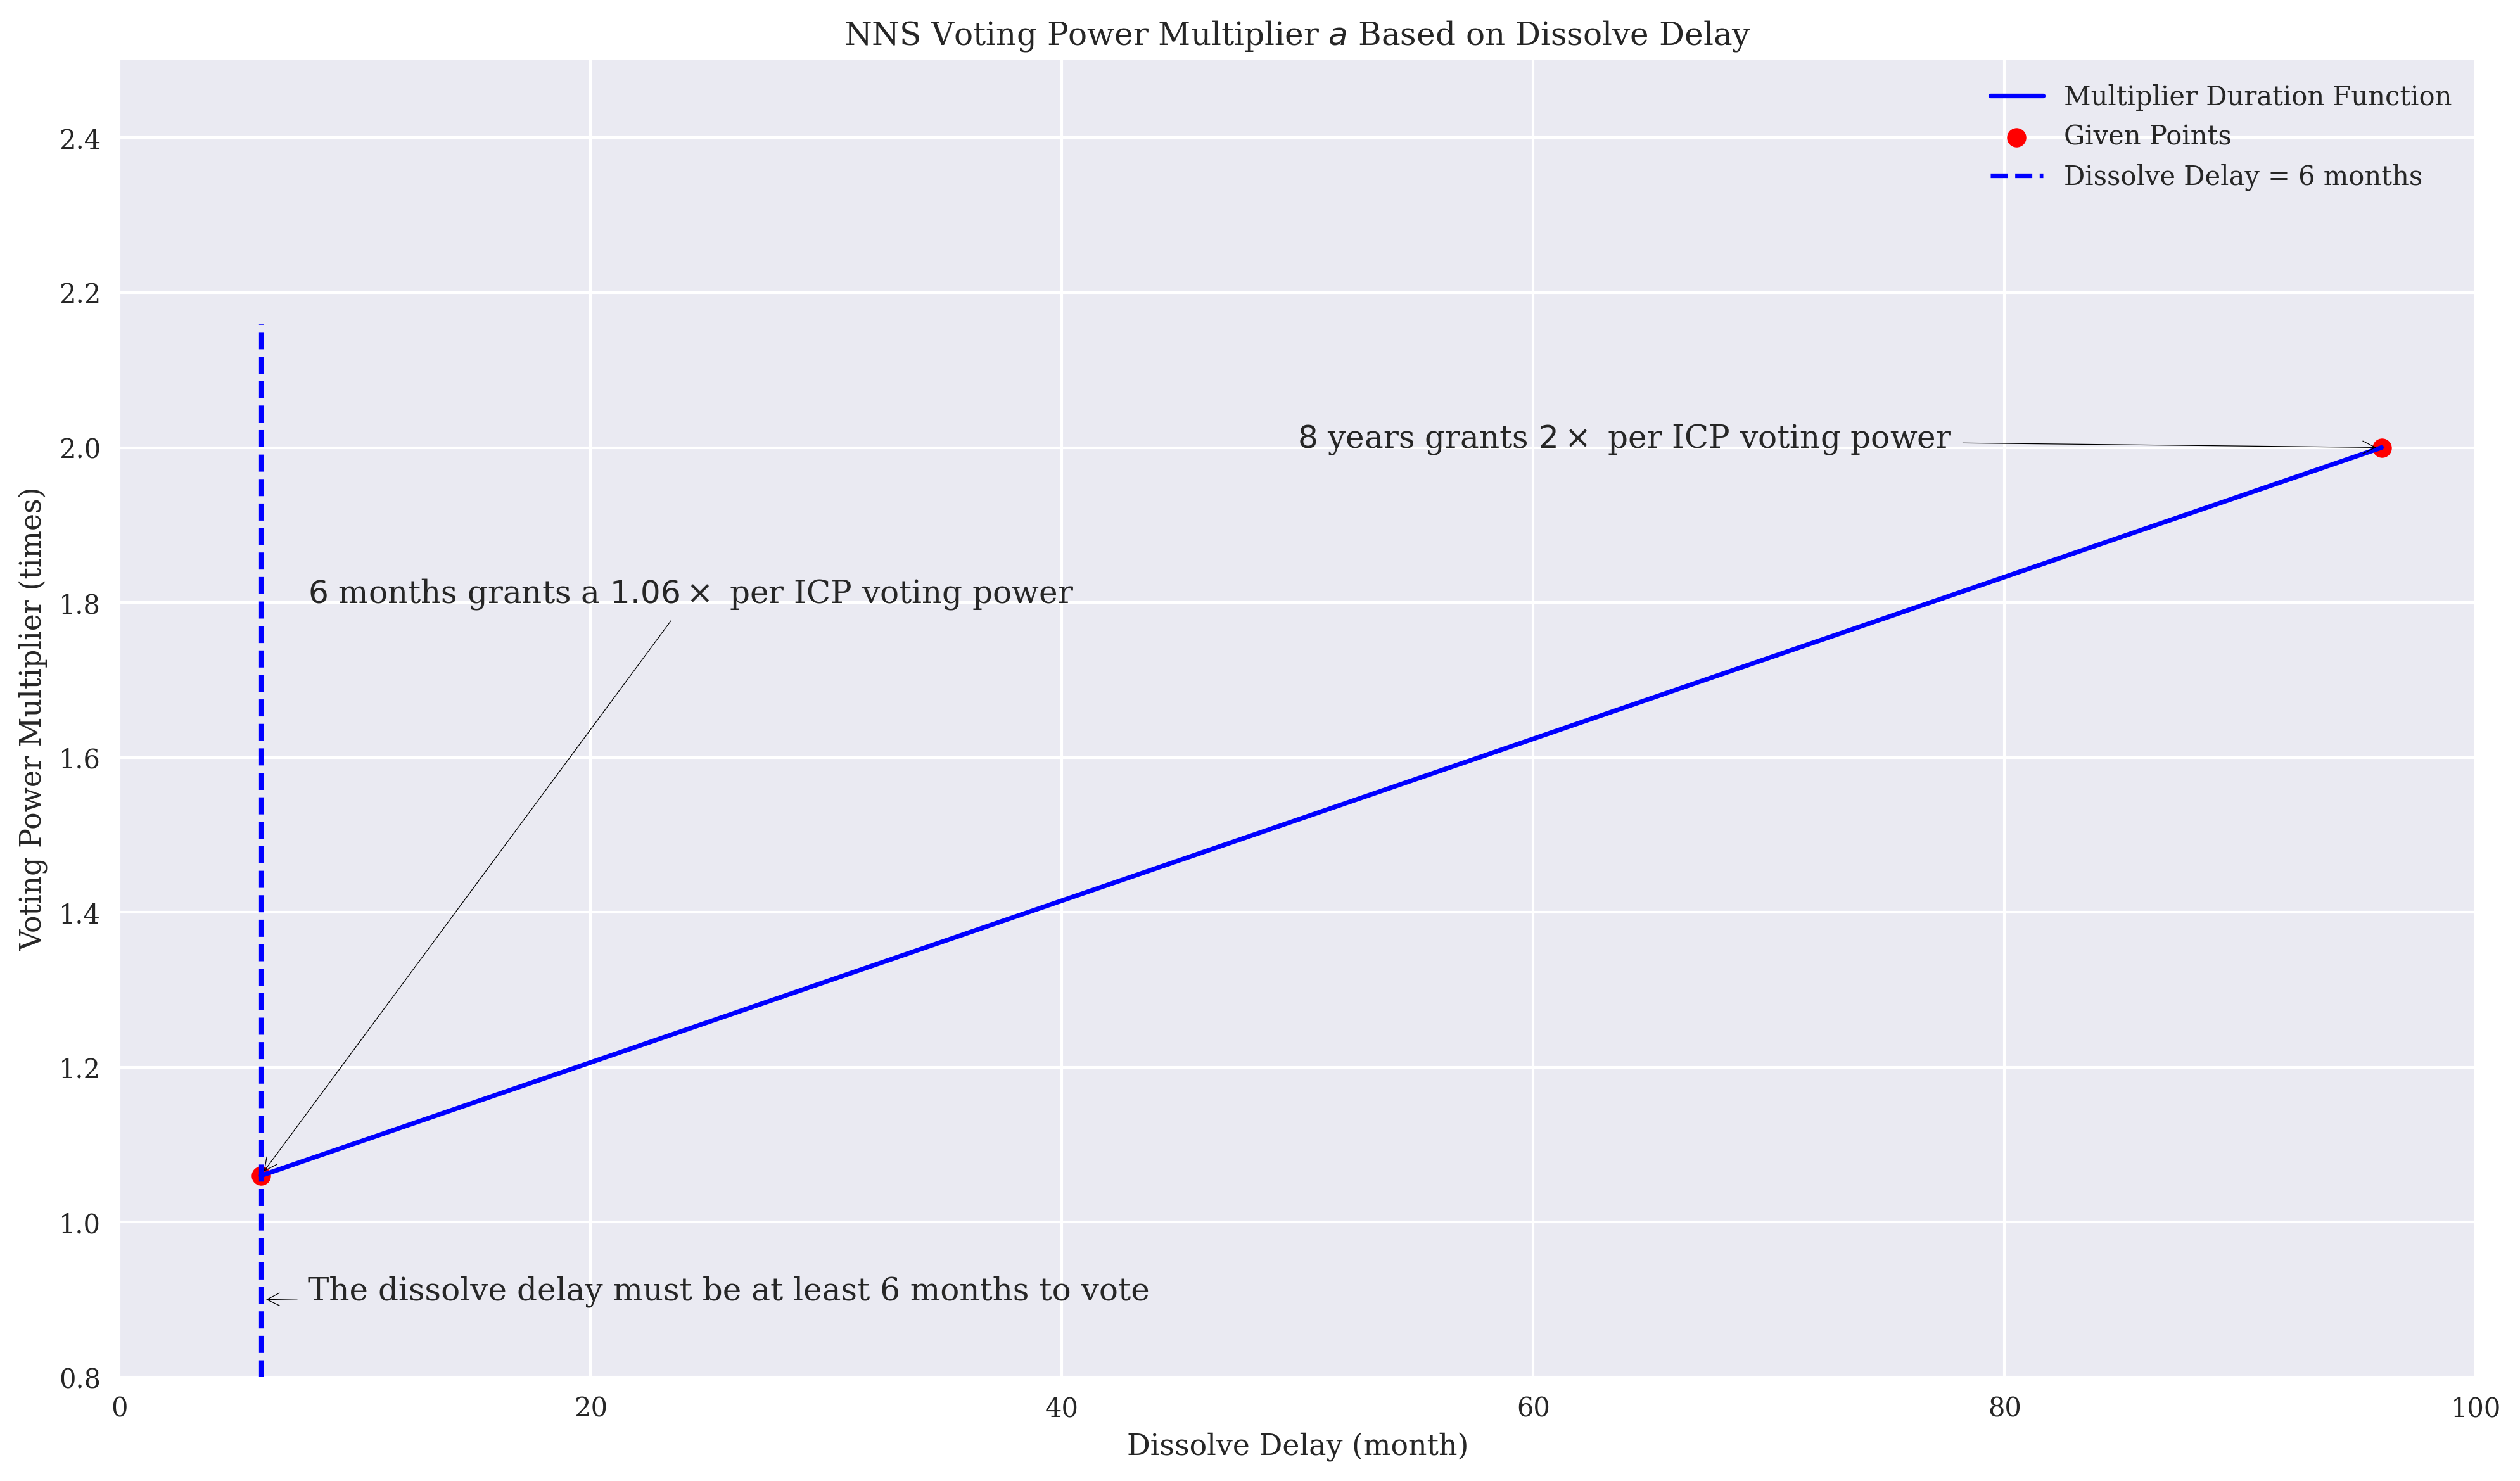

In [403]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16  # Width of the figure
height = 9  # Height of the figure
dpi = 300  # Dots per inch, for high resolution

# Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)

def calculate_slope_intercept(f):
    # Define the points
    x1, y1 = 6, 1.06
    x2, y2 = 96, 2

    # Calculate the slope and intercept for the line segment between the points
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    def wrapper(x):
        return f(x, m, b)

    return wrapper

@calculate_slope_intercept
def multiplier_duration(x, m, b):
    # If x is a single number
    if np.isscalar(x):
        if x < 6:
            return None  # Return None for x < 6
        elif x == 6:
            return 1.06
        elif x > 96:
            return 2
        else:
            return m * x + b
    else:  # If x is an array
        y = np.where(x < 6, None, m * x + b)  # Replace values for x < 6 with None
        y = np.where(x > 96, 2, y)
        return y

# Generate x values from 0 to 100 for the plot
x_values = np.linspace(0, 96, 400)

# Calculate the corresponding y values using the multiplier_duration function
y_values = multiplier_duration(x_values)

# Create a plot, skipping points where x < 6
plt.plot(x_values[x_values >= 6], y_values[x_values >= 6], label="Multiplier Duration Function", color='b')

# Plot the points
x1, y1 = 6, 1.06
x2, y2 = 96, 2
plt.scatter([x1, x2], [y1, y2], color='red', label="Given Points")

# Add a dashed vertical line at x == 6, reaching y == 2
plt.axvline(x=6, ymin=0, ymax=2/2.5, color='blue', linestyle='--', label='Dissolve Delay = 6 months')


# Annotate the point (6, 1.06)
plt.annotate('$6$ months grants a $1.06\\times$ per ICP voting power' ,
             xy=(6, 1.06),
             xytext=(8, 1.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Annotate the point (6, 1.06) with a dashed line
plt.annotate('The dissolve delay must be at least 6 months to vote',
             xy=(6, 0.9),
             xytext=(8, 0.9),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Annotate the point (16, 2)
plt.annotate('$8$ years grants $2 \\times$ per ICP voting power',
             xy=(96, 2),
             xytext=(50, 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)


plt.xlabel("Dissolve Delay (month)")
plt.ylabel("Voting Power Multiplier (times)")
plt.title("NNS Voting Power Multiplier $a$ Based on Dissolve Delay")
plt.legend()
plt.grid(True)


plt.ylim(0.8, 2.5)  # Setting y-axis limits for better visualization
plt.xlim(0, 100)  # Setting x-axis limits for better visualization

# Save the figure in high resolution
fig.savefig("multiplier_duration.png", dpi=dpi)
# Display the plot
plt.show()


In [404]:
class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.wealth = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference
        self.reward = 0
        self.cum_reward = 0
        self.token_stake = 0
        self.action = None
        self.dissolve_delay= None
        self.age = None
        self.governor = 0
        self.age_multiplier = 0
        self.dissolve_delay_multiplier = 0
        self.multiplied_gov_stake = 0
        self.estimated_reward_ratio = 0
        self.reward_ratio = 0

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed):
    np.random.seed(random_seed)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=random_seed)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity_preference) for endowment, staking_threshold, liquidity_preference in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents

# Create an instance of CustomRandomVariableGenerator with desired parameters
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
# Initialize agents using the initialize_agents function
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed)

class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        if t // 12 <= 8:
            yearly_inflation_rate = self.final_i + 0*self.final_i * ((8 - (t // 12)) / 8) ** 2
        else:
            yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
initial_supply = sum(agent.endowment for agent in agents) ### the initial supply is the sum of all agent endowments
reward_calculator = RewardRateCalculator(final_i, initial_supply=initial_supply)

def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.00, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+2):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)

        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)
def simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies):
    current_supplies = current_supplies ### This is the array for the current supplies
    monthly_rewards = monthly_rewards ### This is the array for the monthly rewards
    liquid_counts = []
    stake_counts = []
    dissolve_counts = []
    governor_counts = []
    liquid_tokens_list = []
    stake_tokens_list = []
    dissolve_tokens_list = []
    governor_tokens_list =[]
    multiplied_gov_stakes_list =[]

    for t in range(0,T+1):
        # Update counts
        monthly_reward = monthly_rewards[t]
        liquid_counts.append(sum(1 for agent in agents if agent.token_stake == 0))
        stake_counts.append(sum(1 for agent in agents if agent.token_stake == 1))
        dissolve_counts.append(sum(1 for agent in agents if agent.token_stake == 2))
        governor_counts.append(sum(1 for agent in agents if agent.governor==1))

        # Update counts
        liquid_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 0)
        stake_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 1)
        dissolve_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 2)
        governor_tokens =sum(agent.wealth for agent in agents if agent.governor==1)


        # Storing token values
        liquid_tokens_list.append(liquid_tokens)
        stake_tokens_list.append(stake_tokens)
        dissolve_tokens_list.append(dissolve_tokens)
        governor_tokens_list.append(governor_tokens)

        # Dynamics
        for agent in agents:
            #############################################################
            if agent.governor == 1:
                agent.multiplied_gov_stake = agent.wealth*agent.age_multiplier*agent.dissolve_delay_multiplier
            else:
                agent.multiplied_gov_stake=0
        multiplied_gov_stakes =sum(agent.multiplied_gov_stake for agent in agents if agent.governor==1)
        multiplied_gov_stakes_list.append(multiplied_gov_stakes)

        for agent in agents:
            if multiplied_gov_stakes == 0:
                agent.estimated_reward_ratio =initial_r
            else:
               agent.estimated_reward_ratio = 12*monthly_reward*agent.dissolve_delay_multiplier/multiplied_gov_stakes

            agent.reward_share = agent.multiplied_gov_stake/multiplied_gov_stakes if agent.governor ==1 else 0
            if t == 0:
              agent.reward = 0
              agent.reward_ratio=0
            else:
              agent.reward = agent.reward_share * monthly_reward
              agent.reward_ratio = 12* agent.reward/agent.wealth

            agent.cum_reward += agent.reward
            agent.wealth += agent.reward

            if agent.token_stake == 0:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    agent.token_stake = 1 if agent.action == 1 else 0
                    agent.dissolve_delay = agent.liquidity_preference if agent.governor == 1 else 0
                    agent.dissolve_delay_multiplier = multiplier_duration(agent.dissolve_delay)if agent.governor == 1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor == 1 else 0

            elif agent.token_stake == 1:
                    agent.action = 0 if agent.reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 1
                    agent.token_stake = 2 if agent.action == 1 else 1
                    if agent.action == 0:
                      agent.dissolve_delay = agent.liquidity_preference
                    else:
                      agent.dissolve_delay = agent.dissolve_delay-1

                    agent.governor = 1 if agent.dissolve_delay >=6 else 0
                    agent.dissolve_delay_multiplier = multiplier_duration(agent.dissolve_delay) if agent.governor==1 else 0

                    agent.age = agent.age+1 if agent.governor==1 else 0
                    agent.age_multiplier = 1 if agent.governor==1 else 0

            else:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    if agent.action == 1:
                      agent.dissolve_delay = agent.liquidity_preference
                      agent.token_stake = 1

                    elif agent.dissolve_delay > 0:
                      agent.dissolve_delay = agent.dissolve_delay-1
                      agent.token_stake = 2
                    else:
                      agent.dissolve_delay = 0
                      agent.token_stake = 0

                    agent.governor = 1 if agent.dissolve_delay >=6 else 0
                    agent.dissolve_delay_multiplier = multiplier_duration(agent.dissolve_delay) if agent.governor==1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor==1 else 0


        # Update the lists

    return liquid_counts, stake_counts, dissolve_counts, governor_counts, liquid_tokens_list, stake_tokens_list, dissolve_tokens_list, governor_tokens_list, multiplied_gov_stakes_list

In [405]:
results = simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies)
liquid_counts =results[0]
stake_counts =results[1]
dissolve_counts=results[2]
governor_counts=results[3]
liquid_tokens_list=results[4]
stake_tokens_list =results[5]
dissolve_tokens_list=results[6]
governor_tokens_list=results[7]
multiplied_gov_stakes_list=results[8]

In [406]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(governor_counts)))

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces to the subplots
fig.add_trace(go.Scatter(x=x_values, y=governor_counts, fill='tozeroy', mode='none', line=dict(color='blue'), name='Governor Counts'))
fig.add_trace(go.Scatter(x=x_values, y=governor_tokens_list, fill='tonexty', mode='none', line=dict(color='green'), name='Governor Tokens'), secondary_y=True)

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Governor Counts and Governor Tokens Over Time: The Dissolve Delay",
    legend=dict(x=0.6, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True,
)

# Update secondary y-axis label
fig.update_yaxes(title_text="Tokens", secondary_y=True)

# Show the plot
fig.show()


In [407]:
import plotly.graph_objects as go

# Convert range to list
x_values = list(range(len(liquid_counts)))

# Create a stacked area plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=liquid_counts, fill='tozeroy', mode='none', stackgroup='agents', line=dict(color='blue'), name='Liquid'))
fig.add_trace(go.Scatter(x=x_values, y=stake_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='green'), name='Stake'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='red'), name='Dissolve'))

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Agent's States Over Time: The Dissolve Delay Multiplier",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=12)),
    yaxis=dict(title_font=dict(size=12)),
    title_font=dict(size=16),
    showlegend=True
)

# Show the plot
fig.show()


In [408]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot
fig.add_trace(go.Scatter(x=x_values, y=liquid_tokens_list, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Tokens",
    title="Token Dynamics Over Time: The Dissolve Delay Multiplier",
    legend=dict(x=0.1, y=1.1),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [409]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Calculate the total at each time step for normalization
totals = np.array(liquid_tokens_list) + np.array(stake_tokens_list) + np.array(dissolve_tokens_list)

# Normalize the data
liquid_percent = np.array(liquid_tokens_list) / totals*100
stake_percent = np.array(stake_tokens_list) / totals*100
dissolve_percent = np.array(dissolve_tokens_list) / totals*100

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot with normalized data
fig.add_trace(go.Scatter(x=x_values, y=liquid_percent, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Percentage",
    title="Token Dynamics Over Time (Percentage): The Dissolve Delay Multiplier",
    legend=dict(x=0.5, y=0.5),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),  # Set the y-axis range to 0-100%
    title_font=dict(size=20),
    showlegend=True,
)

# Show the plot
fig.show()


In [410]:
mean_value_D_liquid = np.mean(liquid_percent)
std_deviation_D_liquid = np.std(liquid_percent)
mean_value_D_stake = np.mean(stake_percent)
std_deviation_D_stake = np.std(stake_percent)
mean_value_D_dissolve = np.mean(dissolve_percent)
std_deviation_D_dissolve = np.std(dissolve_percent)

print("Mean Value of liquid token percentage:", mean_value_D_liquid)
print("Standard Deviation of liquid token percentage:", std_deviation_D_liquid)
print("Mean Value of stake token percentage:", mean_value_D_stake)
print("Standard Deviation of stake token percentage:", std_deviation_D_stake)
print("Mean Value of dissolve token percentage:", mean_value_D_dissolve)
print("Standard Deviation of dissolve token percentage:", std_deviation_D_dissolve)

Mean Value of liquid token percentage: 25.207590930410017
Standard Deviation of liquid token percentage: 7.690771387476077
Mean Value of stake token percentage: 41.18891236403056
Standard Deviation of stake token percentage: 29.42398134131301
Mean Value of dissolve token percentage: 33.603496705559415
Standard Deviation of dissolve token percentage: 29.474288474374713


# Part IV: Age Multiplier

In [411]:
# @title Voting Power Multiplier $b$ of Age (month)
age_month = 0 # @param {type:"number"}

def Multiplier_Age(x):
    if x < 0:
        return "the age is out of range"
    elif x > 48:
        return 1.25
    else:
        m = 0.25 / 48
        b = 1
        return m * x + b

y=Multiplier_Age(age_month)
print(y)

1.0


<ipython-input-412-7880275aaf79>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



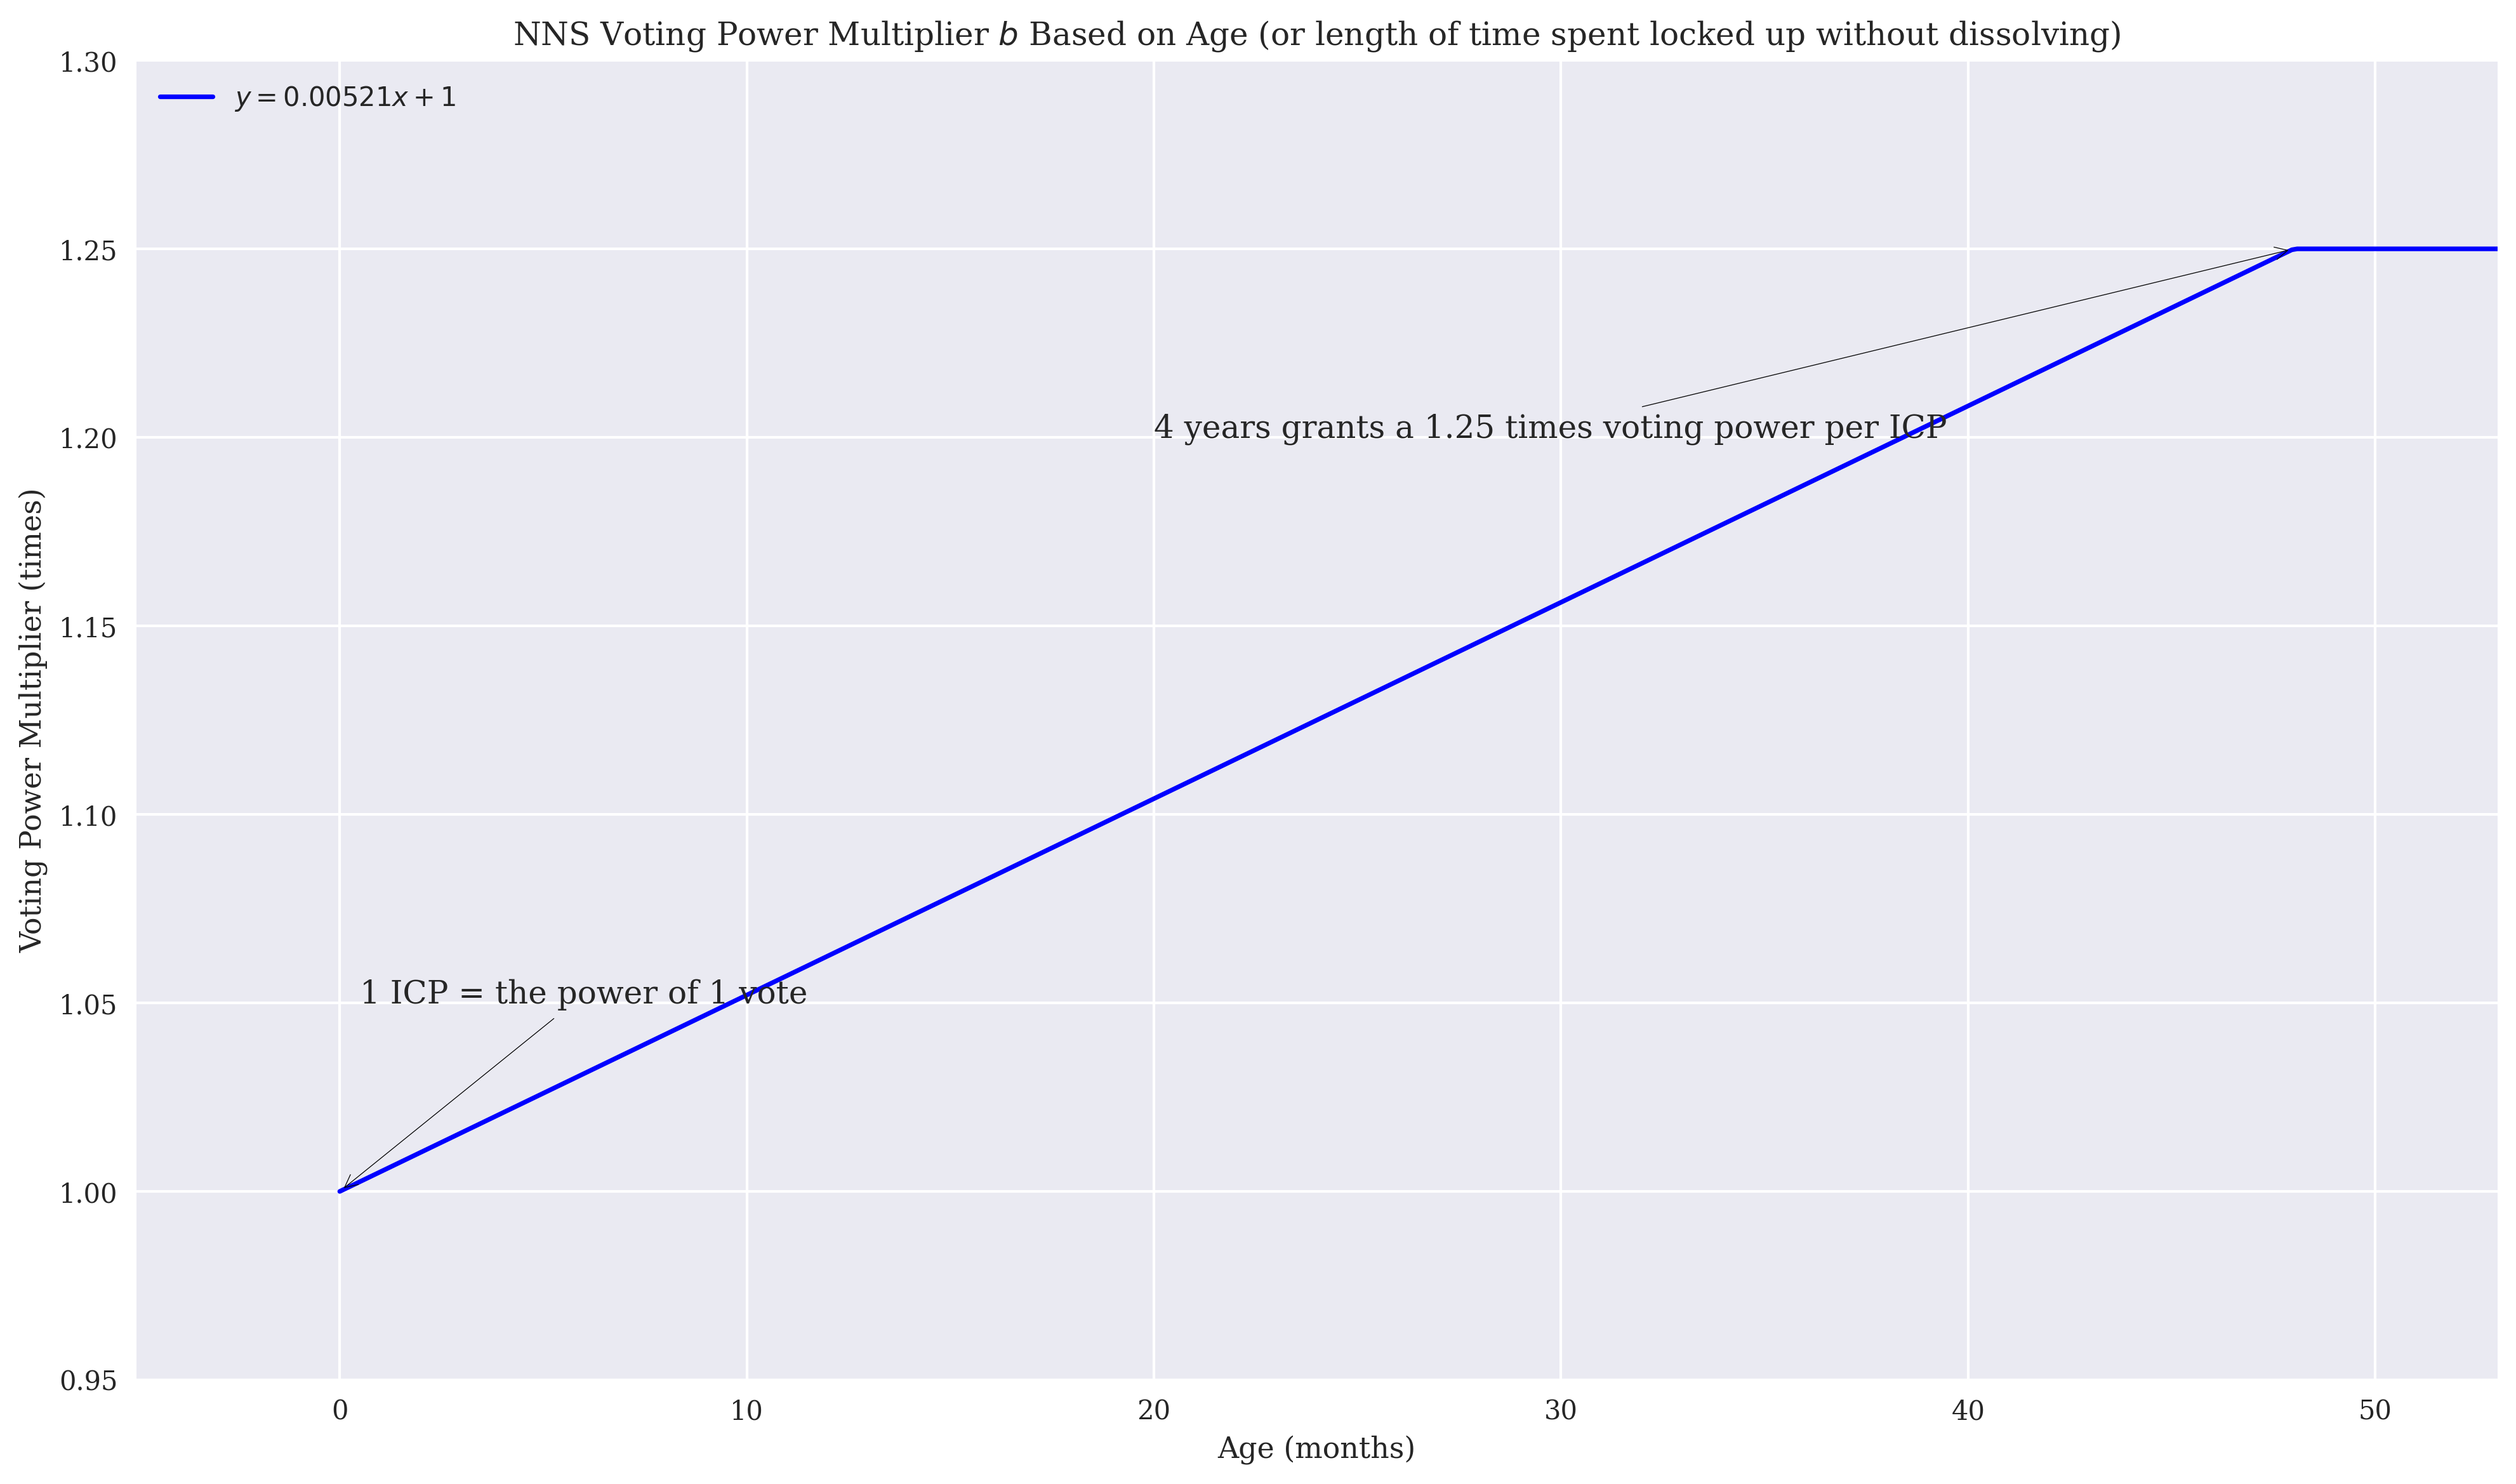

In [412]:
import matplotlib.pyplot as plt
import numpy as np
# Set the style to 'seaborn'
plt.style.use('seaborn')

# Define the aspect ratio and resolution
width = 16  # Width of the figure
height = 9  # Height of the figure
dpi = 300  # Dots per inch, for high resolution

#Set the font to 'Computer Modern'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern'] + plt.rcParams['font.serif']

# Create a new figure with the specified size
fig = plt.figure(figsize=(width, height), dpi=dpi)

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def Multiplier_Age(x):
    if x < 0:
        return "the age is out of range"
    elif x > 48:
        return 1.25
    else:
        m = 0.25 / 48
        b = 1
        return m * x + b

# Generate x values from a bit below 0 to a bit beyond 48
x_values = np.linspace(0, 53, 400)

# Calculate the y-values using the function
y_values = [Multiplier_Age(x) for x in x_values]

# Plot the function
plt.plot(x_values, y_values, '-b', label=f'$y = {0.25/48:.5f}x + 1$')

# Annotate the point (0,0)
plt.annotate('1 ICP = the power of 1 vote',
             xy=(0, 1),
             xytext=(0.5, 1.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Annotate the point (48, 1.25)
plt.annotate('4 years grants a 1.25 times voting power per ICP',
             xy=(48, 1.25),
             xytext=(20, 1.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Formatting
plt.title("NNS Voting Power Multiplier $b$ Based on Age (or length of time spent locked up without dissolving)")
plt.xlabel("Age (months)")
plt.ylabel("Voting Power Multiplier (times)")
plt.legend(loc="upper left")
plt.grid(True)
plt.ylim(0.95, 1.3)  # Setting y-axis limits for better visualization
plt.xlim(-5, 53)  # Setting x-axis limits for better visualization

# Save the figure in high resolution
fig.savefig("multiplier_age.png", dpi=dpi)
# Display the plot
plt.show()


In [413]:
class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.wealth = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference
        self.reward = 0
        self.cum_reward = 0
        self.token_stake = 0
        self.action = None
        self.dissolve_delay= None
        self.age = None
        self.governor = 0
        self.age_multiplier = 0
        self.dissolve_delay_multiplier = 0
        self.multiplied_gov_stake = 0
        self.estimated_reward_ratio = 0
        self.reward_ratio = 0

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed):
    np.random.seed(random_seed)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=random_seed)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity_preference) for endowment, staking_threshold, liquidity_preference in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents

# Create an instance of CustomRandomVariableGenerator with desired parameters
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
# Initialize agents using the initialize_agents function
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed)


class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
initial_supply = sum(agent.endowment for agent in agents) ### the initial supply is the sum of all agent endowments
reward_calculator = RewardRateCalculator(final_i, initial_supply=initial_supply)

def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.00, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+2):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)


        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)
def simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies):
    current_supplies = current_supplies ### This is the array for the current supplies
    monthly_rewards = monthly_rewards ### This is the array for the monthly rewards
    liquid_counts = []
    stake_counts = []
    dissolve_counts = []
    governor_counts = []
    liquid_tokens_list = []
    stake_tokens_list = []
    dissolve_tokens_list = []
    governor_tokens_list =[]
    multiplied_gov_stakes_list =[]

    for t in range(0,T+1):
        # Update counts
        monthly_reward = monthly_rewards[t]
        liquid_counts.append(sum(1 for agent in agents if agent.token_stake == 0))
        stake_counts.append(sum(1 for agent in agents if agent.token_stake == 1))
        dissolve_counts.append(sum(1 for agent in agents if agent.token_stake == 2))
        governor_counts.append(sum(1 for agent in agents if agent.governor==1))

        # Update counts
        liquid_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 0)
        stake_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 1)
        dissolve_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 2)
        governor_tokens =sum(agent.wealth for agent in agents if agent.governor==1)


        # Storing token values
        liquid_tokens_list.append(liquid_tokens)
        stake_tokens_list.append(stake_tokens)
        dissolve_tokens_list.append(dissolve_tokens)
        governor_tokens_list.append(governor_tokens)

        # Dynamics
        for agent in agents:
            #############################################################
            if agent.governor == 1:
                agent.multiplied_gov_stake = agent.wealth*agent.age_multiplier*agent.dissolve_delay_multiplier
            else:
                agent.multiplied_gov_stake=0
        multiplied_gov_stakes =sum(agent.multiplied_gov_stake for agent in agents if agent.governor==1)
        multiplied_gov_stakes_list.append(multiplied_gov_stakes)

        for agent in agents:
            if multiplied_gov_stakes == 0:
                agent.estimated_reward_ratio = initial_r
            else:
               agent.estimated_reward_ratio = 12*monthly_reward*agent.dissolve_delay_multiplier/multiplied_gov_stakes

            agent.reward_share = agent.multiplied_gov_stake/multiplied_gov_stakes if agent.governor ==1 else 0
            if t == 0:
              agent.reward = 0
              agent.reward_ratio=0
            else:
              agent.reward = agent.reward_share * monthly_reward
              agent.reward_ratio = 12* agent.reward/agent.wealth

            agent.cum_reward += agent.reward
            agent.wealth += agent.reward

            if agent.token_stake == 0:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    agent.token_stake = 1 if agent.action == 1 else 0
                    agent.dissolve_delay = 6 if agent.governor == 1 else 0
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor == 1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor == 1 else 0

            elif agent.token_stake == 1:
                    agent.action = 0 if agent.reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 1
                    agent.governor = 1 if agent.action ==0 else 0
                    agent.token_stake = 2 if agent.action == 1 else 1
                    agent.dissolve_delay = 6 if agent.governor==1 else 5
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor==1 else 0

                    agent.age = agent.age+1 if agent.governor==1 else 0
                    agent.age_multiplier = Multiplier_Age(agent.age) if agent.governor==1 else 0


            else:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold + threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    if agent.governor==1:
                      agent.dissolve_delay = 6
                      agent.token_stake = 1
                    elif agent.dissolve_delay>0:
                      agent.dissolve_delay-=1
                      agent.token_stake=2
                    else:
                      agent.dissolve_delay=0
                      agent.token_stake=0
                    agent.dissolve_delay_multiplier = 1.06 if agent.governor==1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor==1 else 0


        # Update the lists

    return liquid_counts, stake_counts, dissolve_counts, governor_counts, liquid_tokens_list, stake_tokens_list, dissolve_tokens_list, governor_tokens_list, multiplied_gov_stakes_list

In [414]:
results = simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies)
liquid_counts =results[0]
stake_counts =results[1]
dissolve_counts=results[2]
governor_counts=results[3]
liquid_tokens_list=results[4]
stake_tokens_list =results[5]
dissolve_tokens_list=results[6]
governor_tokens_list=results[7]
multiplied_gov_stakes_list=results[8]

In [415]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(governor_counts)))

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces to the subplots
fig.add_trace(go.Scatter(x=x_values, y=governor_counts, fill='tozeroy', mode='none', line=dict(color='blue'), name='Governor Counts'))
fig.add_trace(go.Scatter(x=x_values, y=governor_tokens_list, fill='tonexty', mode='none', line=dict(color='green'), name='Governor Tokens'), secondary_y=True)

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Governor Counts and Governor Tokens Over Time: The Age Multiplier",
    legend=dict(x=0.6, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True,
)

# Update secondary y-axis label
fig.update_yaxes(title_text="Tokens", secondary_y=True)

# Show the plot
fig.show()


In [416]:
import plotly.graph_objects as go

# Convert range to list
x_values = list(range(len(liquid_counts)))

# Create a stacked area plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=liquid_counts, fill='tozeroy', mode='none', stackgroup='agents', line=dict(color='blue'), name='Liquid'))
fig.add_trace(go.Scatter(x=x_values, y=stake_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='green'), name='Stake'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='red'), name='Dissolve'))

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Agent's States Over Time: The Age Multiplier",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [417]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot
fig.add_trace(go.Scatter(x=x_values, y=liquid_tokens_list, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Tokens",
    title="Token Dynamics Over Time: The Age Multiplier",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [418]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Calculate the total at each time step for normalization
totals = np.array(liquid_tokens_list) + np.array(stake_tokens_list) + np.array(dissolve_tokens_list)

# Normalize the data
liquid_percent = np.array(liquid_tokens_list) / totals*100
stake_percent = np.array(stake_tokens_list) / totals*100
dissolve_percent = np.array(dissolve_tokens_list) / totals*100

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot with normalized data
fig.add_trace(go.Scatter(x=x_values, y=liquid_percent, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Percentage",
    title="Token Dynamics Over Time (Percentage): The Age Multiplier",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=12)),
    yaxis=dict(title_font=dict(size=12)),  # Set the y-axis range to 0-100%
    title_font=dict(size=16),
    showlegend=True,
)

# Show the plot
fig.show()


In [419]:
mean_value_A_liquid = np.mean(liquid_percent)
std_deviation_A_liquid = np.std(liquid_percent)
mean_value_A_stake = np.mean(stake_percent)
std_deviation_A_stake = np.std(stake_percent)
mean_value_A_dissolve = np.mean(dissolve_percent)
std_deviation_A_dissolve = np.std(dissolve_percent)

print("Mean Value of liquid token percentage:", mean_value_A_liquid)
print("Standard Deviation of liquid token percentage:", std_deviation_A_liquid)
print("Mean Value of stake token percentage:", mean_value_A_stake)
print("Standard Deviation of stake token percentage:", std_deviation_A_stake)
print("Mean Value of dissolve token percentage:", mean_value_A_dissolve)
print("Standard Deviation of dissolve token percentage:", std_deviation_A_dissolve)

Mean Value of liquid token percentage: 38.26692450257539
Standard Deviation of liquid token percentage: 9.795749336177503
Mean Value of stake token percentage: 36.45701491639795
Standard Deviation of stake token percentage: 23.158400744397927
Mean Value of dissolve token percentage: 25.276060581026652
Standard Deviation of dissolve token percentage: 23.154609420648207


# Part V: All Together

In [420]:
def Multiplier_Age(x):
    if x < 0:
        return "the age is out of range"
    elif x > 48:
        return 1.25
    else:
        m = 0.25 / 48
        b = 1
        return m * x + b
def calculate_slope_intercept(f):
    # Define the points
    x1, y1 = 6, 1.06
    x2, y2 = 96, 2

    # Calculate the slope and intercept for the line segment between the points
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    def wrapper(x):
        return f(x, m, b)

    return wrapper

@calculate_slope_intercept
def multiplier_duration(x, m, b):
    # If x is a single number
    if np.isscalar(x):
        if x < 6:
            return "the dissolve delay must be at least 6 months"
        elif x == 6:
            return 1.06
        elif x > 96:
            return 2
        else:
            return m * x + b
    else:  # If x is an array
        y = np.where(x < 6, "the dissolve delay must be at least 6 months", m * x + b)
        y = np.where(x > 96, 2, y)
        return y

class Agent:
    def __init__(self, endowment, staking_threshold, liquidity_preference):
        self.endowment = endowment
        self.wealth = endowment
        self.staking_threshold = staking_threshold
        self.liquidity_preference = liquidity_preference
        self.reward = 0
        self.cum_reward = 0
        self.token_stake = 0
        self.action = None
        self.dissolve_delay= None
        self.age = None
        self.governor = 0
        self.age_multiplier = 0
        self.dissolve_delay_multiplier = 0
        self.multiplied_gov_stake = 0
        self.estimated_reward_ratio = 0
        self.reward_ratio = 0

class CustomRandomVariableGenerator:
    def __init__(self, mean1, mean2, std_dev):
        self.mean1 = mean1
        self.mean2 = mean2
        self.std_dev = std_dev

    def liquidity_preference(self, num_samples):
        random_variables = []
        for _ in range(num_samples):
            rand_num = np.random.random()
            if rand_num < 0.5:
                value = int(np.random.normal(self.mean1, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean1, self.std_dev))
            else:
                value = int(np.random.normal(self.mean2, self.std_dev))
                while value < 6 or value > 96:
                    value = int(np.random.normal(self.mean2, self.std_dev))
            random_variables.append(value)
        return random_variables

def initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed):
    np.random.seed(random_seed)  # Setting a seed for reproducibility
    endowments = np.random.lognormal(mean_log, sigma_log, N)
    staking_thresholds = gamma.rvs(k, scale=theta, size=N, random_state=random_seed)

    # Generate liquidity preference values using the provided generator
    liquidity_preferences = liquidity_generator.liquidity_preference(N)

    agents = [Agent(endowment, staking_threshold, liquidity_preference) for endowment, staking_threshold, liquidity_preference in zip(endowments, staking_thresholds, liquidity_preferences)]
    return agents

# Create an instance of CustomRandomVariableGenerator with desired parameters
liquidity_generator = CustomRandomVariableGenerator(mean1, mean2, std_dev)
# Initialize agents using the initialize_agents function
agents = initialize_agents(N, mean_log, sigma_log, k, theta, liquidity_generator, random_seed)

class RewardRateCalculator:
    def __init__(self, final_i, initial_supply):
        self.final_i = final_i
        self.initial_supply = initial_supply

    def calculate_yearly_inflation_rate(self, t):
        if t // 12 <= 8:
            yearly_inflation_rate = self.final_i + self.final_i * ((8 - (t // 12)) / 8) ** 2
        else:
            yearly_inflation_rate = self.final_i
        return yearly_inflation_rate

# Correcting the instantiation of the RewardRateCalculator
final_i = 0.05  # Example inflation rate
initial_supply = sum(agent.endowment for agent in agents) ### the initial supply is the sum of all agent endowments
reward_calculator = RewardRateCalculator(final_i, initial_supply=initial_supply)

def generate_monthly_rewards(reward_calculator, T=100, noise_scale=0.00, seed=42):
    np.random.seed(seed)  # Set the random seed for replicability
    monthly_rewards = [np.nan]   # Initialize with NaNs
    yearly_rewards = [np.nan]  # Initialize with NaNs for yearly rewards
    yearly_inflation_rates =[np.nan]
    yearly_start_supply = reward_calculator.initial_supply
    current_supplies = [yearly_start_supply]  # Start with initial supply
    total_years = T // 12

    for year in range(1, total_years+2):
        start_idx = (year-1) * 12+1
        end_idx = min(year * 12, T)

        yearly_inflation_rate = reward_calculator.calculate_yearly_inflation_rate(start_idx)
        yearly_reward = yearly_start_supply * yearly_inflation_rate

        for month in range(start_idx, end_idx+1):
            monthly_reward = yearly_reward / 12
            monthly_rewards.append(monthly_reward)

            # Store the constant yearly reward for each month in the year
            yearly_rewards.append(yearly_reward)
            yearly_inflation_rates.append(yearly_inflation_rate)

        accumulated_sum = yearly_start_supply
        result = []
        for i in range(start_idx, end_idx + 1):
          accumulated_sum += monthly_rewards[i]
          result.append(accumulated_sum)

        # Append the result to current_supplies
        current_supplies.extend(result)
        # Update the current supply at the end of each year
        yearly_start_supply = accumulated_sum


    return monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies

# Generate monthly rewards, yearly rewards, and current supplies for T=200
monthly_rewards, yearly_rewards, yearly_inflation_rates, current_supplies = generate_monthly_rewards(reward_calculator)
def simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies):
    current_supplies = current_supplies ### This is the array for the current supplies
    monthly_rewards = monthly_rewards ### This is the array for the monthly rewards
    liquid_counts = []
    stake_counts = []
    dissolve_counts = []
    governor_counts = []
    liquid_tokens_list = []
    stake_tokens_list = []
    dissolve_tokens_list = []
    governor_tokens_list =[]
    multiplied_gov_stakes_list =[]

    for t in range(0,T+1):
        # Update counts
        monthly_reward = monthly_rewards[t]
        liquid_counts.append(sum(1 for agent in agents if agent.token_stake == 0))
        stake_counts.append(sum(1 for agent in agents if agent.token_stake == 1))
        dissolve_counts.append(sum(1 for agent in agents if agent.token_stake == 2))
        governor_counts.append(sum(1 for agent in agents if agent.governor==1))

        # Update counts
        liquid_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 0)
        stake_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 1)
        dissolve_tokens = sum(agent.wealth for agent in agents if agent.token_stake == 2)
        governor_tokens =sum(agent.wealth for agent in agents if agent.governor==1)


        # Storing token values
        liquid_tokens_list.append(liquid_tokens)
        stake_tokens_list.append(stake_tokens)
        dissolve_tokens_list.append(dissolve_tokens)
        governor_tokens_list.append(governor_tokens)

        # Dynamics
        for agent in agents:
            #############################################################
            if agent.governor == 1:
                agent.multiplied_gov_stake = agent.wealth*agent.age_multiplier*agent.dissolve_delay_multiplier
            else:
                agent.multiplied_gov_stake=0
        multiplied_gov_stakes =sum(agent.multiplied_gov_stake for agent in agents if agent.governor==1)
        multiplied_gov_stakes_list.append(multiplied_gov_stakes)

        for agent in agents:
            if multiplied_gov_stakes == 0:
                agent.estimated_reward_ratio = initial_r
            else:
               agent.estimated_reward_ratio = 12*monthly_reward*agent.dissolve_delay_multiplier/multiplied_gov_stakes

            agent.reward_share = agent.multiplied_gov_stake/multiplied_gov_stakes if agent.governor ==1 else 0
            if t == 0:
              agent.reward = 0
              agent.reward_ratio=0
            else:
              agent.reward = agent.reward_share * monthly_reward
              agent.reward_ratio = 12* agent.reward/agent.wealth

            agent.cum_reward += agent.reward
            agent.wealth += agent.reward

            if agent.token_stake == 0:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold +threshold_shock[t-1] else 0
                    agent.governor = 1 if agent.action ==1 else 0
                    agent.token_stake = 1 if agent.action == 1 else 0
                    agent.dissolve_delay = agent.liquidity_preference if agent.governor == 1 else 0
                    agent.dissolve_delay_multiplier = multiplier_duration(agent.dissolve_delay)if agent.governor == 1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor == 1 else 0

            elif agent.token_stake == 1:
                    agent.action = 0 if agent.reward_ratio >= agent.staking_threshold +threshold_shock[t-1] else 1
                    agent.token_stake = 2 if agent.action == 1 else 1
                    if agent.action == 0:
                      agent.dissolve_delay = agent.liquidity_preference
                    else:
                      agent.dissolve_delay = agent.dissolve_delay-1


                    agent.governor = 1 if agent.dissolve_delay >=6 else 0
                    agent.dissolve_delay_multiplier = multiplier_duration(agent.dissolve_delay) if agent.governor==1 else 0

                    agent.age = agent.age+1 if agent.governor==1 else 0
                    agent.age_multiplier = Multiplier_Age(agent.age) if agent.action==0 else 0

            else:
                    agent.action = 1 if agent.estimated_reward_ratio >= agent.staking_threshold +threshold_shock[t-1] else 0
                    if agent.action == 1:
                      agent.dissolve_delay = agent.liquidity_preference
                      agent.token_stake = 1
                    elif agent.dissolve_delay>0:
                      agent.dissolve_delay = agent.dissolve_delay-1
                      agent.token_stake = 2
                    else:
                      agent.dissolve_delay=0
                      agent.token_stake=0

                    agent.governor = 1 if agent.dissolve_delay >=6 else 0
                    agent.dissolve_delay_multiplier = multiplier_duration(agent.dissolve_delay) if agent.governor==1 else 0
                    agent.age =0
                    agent.age_multiplier = 1 if agent.governor==1 else 0


        # Update the lists

    return liquid_counts, stake_counts, dissolve_counts, governor_counts, liquid_tokens_list, stake_tokens_list, dissolve_tokens_list, governor_tokens_list, multiplied_gov_stakes_list


In [421]:
results = simulate_dynamics(agents, T=T, monthly_rewards=monthly_rewards, current_supplies=current_supplies)
liquid_counts =results[0]
stake_counts =results[1]
dissolve_counts=results[2]
governor_counts=results[3]
liquid_tokens_list=results[4]
stake_tokens_list =results[5]
dissolve_tokens_list=results[6]
governor_tokens_list=results[7]
multiplied_gov_stakes_list=results[8]

In [422]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(governor_counts)))

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces to the subplots
fig.add_trace(go.Scatter(x=x_values, y=governor_counts, fill='tozeroy', mode='none', line=dict(color='blue'), name='Governor Counts'))
fig.add_trace(go.Scatter(x=x_values, y=governor_tokens_list, fill='tonexty', mode='none', line=dict(color='green'), name='Governor Tokens'), secondary_y=True)

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Governor Counts and Governor Tokens Over Time: All Together",
    legend=dict(x=0.6, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True,
)

# Update secondary y-axis label
fig.update_yaxes(title_text="Tokens", secondary_y=True)

# Show the plot
fig.show()


In [423]:
import plotly.graph_objects as go

# Convert range to list
x_values = list(range(len(liquid_counts)))

# Create a stacked area plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=liquid_counts, fill='tozeroy', mode='none', stackgroup='agents', line=dict(color='blue'), name='Liquid'))
fig.add_trace(go.Scatter(x=x_values, y=stake_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='green'), name='Stake'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_counts, fill='tonexty', mode='none', stackgroup='agents', line=dict(color='red'), name='Dissolve'))

# Update layout
fig.update_layout(
    xaxis_title="Period (t)",
    yaxis_title="Count of Agents",
    title="Distribution of Agent's States Over Time: All Together",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [424]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot
fig.add_trace(go.Scatter(x=x_values, y=liquid_tokens_list, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_tokens_list, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Tokens",
    title="Token Dynamics Over Time",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    title_font=dict(size=20),
    showlegend=True
)

# Show the plot
fig.show()


In [425]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert range to list
x_values = list(range(len(liquid_tokens_list)))

# Calculate the total at each time step for normalization
totals = np.array(liquid_tokens_list) + np.array(stake_tokens_list) + np.array(dissolve_tokens_list)

# Normalize the data
liquid_percent = np.array(liquid_tokens_list) / totals*100
stake_percent = np.array(stake_tokens_list) / totals*100
dissolve_percent = np.array(dissolve_tokens_list) / totals*100

# Create a new subplot with specified width and height
fig = make_subplots(rows=1, cols=1)
fig.update_layout(width=800, height=400)  # Adjust width and height as needed

# Stacked area plot with normalized data
fig.add_trace(go.Scatter(x=x_values, y=liquid_percent, fill='tozeroy', mode='none', stackgroup='tokens', name='Liquid Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=stake_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Stake Tokens'))
fig.add_trace(go.Scatter(x=x_values, y=dissolve_percent, fill='tonexty', mode='none', stackgroup='tokens', name='Dissolve Tokens'))

# Update layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Percentage",
    title="Token Dynamics Over Time (Percentage)",
    legend=dict(x=0.8, y=1.3),
    xaxis=dict(title_font=dict(size=12)),
    yaxis=dict(title_font=dict(size=12)),  # Set the y-axis range to 0-100%
    title_font=dict(size=16),
    showlegend=True,
)

# Show the plot
fig.show()


In [426]:
mean_value_H_liquid = np.mean(liquid_percent)
std_deviation_H_liquid = np.std(liquid_percent)
mean_value_H_stake = np.mean(stake_percent)
std_deviation_H_stake = np.std(stake_percent)
mean_value_H_dissolve = np.mean(dissolve_percent)
std_deviation_H_dissolve = np.std(dissolve_percent)

print("Mean Value of liquid token percentage:", mean_value_H_liquid)
print("Standard Deviation of liquid token percentage:", std_deviation_H_liquid)
print("Mean Value of stake token percentage:", mean_value_H_stake)
print("Standard Deviation of stake token percentage:", std_deviation_H_stake)
print("Mean Value of dissolve token percentage:", mean_value_H_dissolve)
print("Standard Deviation of dissolve token percentage:", std_deviation_H_dissolve)

Mean Value of liquid token percentage: 21.168057805304688
Standard Deviation of liquid token percentage: 8.472583020023087
Mean Value of stake token percentage: 59.09992334489192
Standard Deviation of stake token percentage: 26.268378717501502
Mean Value of dissolve token percentage: 19.732018849803396
Standard Deviation of dissolve token percentage: 26.18880046626315
